<h1> Lab 3: Reducing Crime</h1>

<h3> Stage 1: Draft Report</h3>

<h5> Team 2: Maria Auslander, Megha Bhardwaj, Govin Muthukrishnan, Teerapong Ninvoraskul</h5>

## 1. An Introduction

Our research team has been hired by the political campaign to provide statistical information that can assist in generating meaningful policy suggestions. 

Crime is one of the major issues of society and often cannot be controlled by law enforcement alone. We also lean on officials and lawmakers to institute applicable policies and reforms that help reduce crime rate. To create policies with a greater chance of success in bringing results, we first need to understand the determinants of crime.  

For this purpose, we are given a dataset of crime statistics for a selection of counties in North Carolina. This dataset has been populated by studies, research and also publicly available government databases. We start with a simple regression model trying to understand the effect of population density on crime rate. Three of the key variables we use in our model:
- The probability of arrest (ratio of arrests to offenses) is drawn from the FBI's Uniform Crime Reports
- Population Density as higher population density leads to higher diversity in education and economic backgrounds leading to more crime.
- The probability of conviction (ratio of convictions to arrests) is taken from the prison and probation files of the North Carolina Department of Correction

Our team started research with *crime rate* as our outcome variable and *population density* as our key explanatory variable. Higher population density leads us to believe a larger diversity and possibly affecting crime rates. This diversity is expected in gender, race, education, economic status and many more.

As we begin to build our models, we incrementally introduce and remove variables as we believe can produce meaningful results 

In [1]:
# install.packages("lmtest")
# install.packages("sandwich")
# install.packages("stargazer")
# install.packages("car")
#install.packages("data.table")
install.packages("corrplot")

Installing package into 'C:/Users/maria/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'corrplot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\maria\AppData\Local\Temp\RtmpikrsfN\downloaded_packages


In [2]:
library(lmtest)
library(sandwich)
library(stargazer)
library(car)
library(caret)
library(corrplot)

Warning message:
"package 'lmtest' was built under R version 3.6.2"Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Warning message:
"package 'sandwich' was built under R version 3.6.2"
Please cite as: 

 Hlavac, Marek (2018). stargazer: Well-Formatted Regression and Summary Statistics Tables.
 R package version 5.2.2. https://CRAN.R-project.org/package=stargazer 

Warning message:
"package 'car' was built under R version 3.6.3"Loading required package: carData
Loading required package: lattice
Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Warning message:
"package 'corrplot' was built under R version 3.6.3"corrplot 0.84 loaded


In [3]:
crime = read.csv("crime_v2.csv")
head(crime)

county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,...,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle
1,87,0.0356036,0.298270,0.527595997,0.436170,6.71,0.00182786,2.4226327,30.99368,...,408.7245,221.2701,453.1722,274.1775,334.54,477.58,292.09,311.91,0.08016878,0.07787097
3,87,0.0152532,0.132029,1.481480002,0.450000,6.35,0.00074588,1.0463320,26.89208,...,376.2542,196.0101,258.5650,192.3077,300.38,409.83,362.96,301.47,0.03022670,0.08260694
5,87,0.0129603,0.444444,0.267856985,0.600000,6.76,0.00123431,0.4127659,34.81605,...,372.2084,229.3209,305.9441,209.6972,237.65,358.98,331.53,281.37,0.46511629,0.07211538
7,87,0.0267532,0.364760,0.525424004,0.435484,7.14,0.00152994,0.4915572,42.94759,...,397.6901,191.1720,281.0651,256.7214,281.80,412.15,328.27,299.03,0.27362204,0.07353726
9,87,0.0106232,0.518219,0.476563007,0.442623,8.22,0.00086018,0.5469484,28.05474,...,377.3126,206.8215,289.3125,215.1933,290.89,377.35,367.23,342.82,0.06008584,0.07069755
11,87,0.0146067,0.524664,0.068376102,0.500000,13.00,0.00288203,0.6113361,35.22974,...,401.3378,187.8255,258.5650,237.1507,258.60,391.48,325.71,275.22,0.31952664,0.09891920


In [4]:
summary(crime)

     county           year        crmrte             prbarr       
 Min.   :  1.0   Min.   :87   Min.   :0.005533   Min.   :0.09277  
 1st Qu.: 52.0   1st Qu.:87   1st Qu.:0.020927   1st Qu.:0.20568  
 Median :105.0   Median :87   Median :0.029986   Median :0.27095  
 Mean   :101.6   Mean   :87   Mean   :0.033400   Mean   :0.29492  
 3rd Qu.:152.0   3rd Qu.:87   3rd Qu.:0.039642   3rd Qu.:0.34438  
 Max.   :197.0   Max.   :87   Max.   :0.098966   Max.   :1.09091  
 NA's   :6       NA's   :6    NA's   :6          NA's   :6        
        prbconv      prbpris           avgsen           polpc         
            : 5   Min.   :0.1500   Min.   : 5.380   Min.   :0.000746  
 0.588859022: 2   1st Qu.:0.3648   1st Qu.: 7.340   1st Qu.:0.001231  
 `          : 1   Median :0.4234   Median : 9.100   Median :0.001485  
 0.068376102: 1   Mean   :0.4108   Mean   : 9.647   Mean   :0.001702  
 0.140350997: 1   3rd Qu.:0.4568   3rd Qu.:11.420   3rd Qu.:0.001877  
 0.154451996: 1   Max.   :0.6000   Max

Missing Values - The EDA shows there are 6 missing values in the dataset. We will remove those values. 

Top Coding - The wages variables cap at a maximum value of around $650 with the exception of services wages that have some outliers. The wages variable  seem to be top coded either to prevent extreme outliers that are common with wages. Many inequality measures are sensitive to the values at the bottom and/or top of the income distribution, and some are not defined for non-positive values of income (e.g., any measure that calculates a logarithm). Therefore, comparative researchers sometimes trim the distribution (by deleting the top and bottom 1% for example) or impose bottom codes and top codes to provide a common calculation of lower and upper limits, method often referred to as windsorising. 

In [5]:
# Removing missing values from the two variables
#summary(crime)

crime$prbconv<-as.numeric(as.character(crime$prbconv))
crime=crime[complete.cases(crime),]

Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"

Next we will analyze the correlation matrix with all the variables in our dataset. This will help us understand the 
relationship among them and help with selection of dependent variables for model specification. For the maximalist model, we will pick variables that have correlation of over 0.1 with the outcome variable.

Density is highly correlated with Urban(corr > 0.8). we will use only one of these two since they seem to be conveying the same information.
wtrd and wfir are closely related to wfed (corr > 0.6)so we will use only wfed in our model since adding wtrd and wfir will not add value to our model

Warning message in ind1:ind2:
"numerical expression has 2 elements: only the first used"Warning message in ind1:ind2:
"numerical expression has 3 elements: only the first used"Warning message in text.default(pos.xlabel[, 1], pos.xlabel[, 2], newcolnames, srt = tl.srt, :
""text.cex" is not a graphical parameter"Warning message in text.default(pos.ylabel[, 1], pos.ylabel[, 2], newrownames, col = tl.col, :
""text.cex" is not a graphical parameter"Warning message in title(title, ...):
""text.cex" is not a graphical parameter"

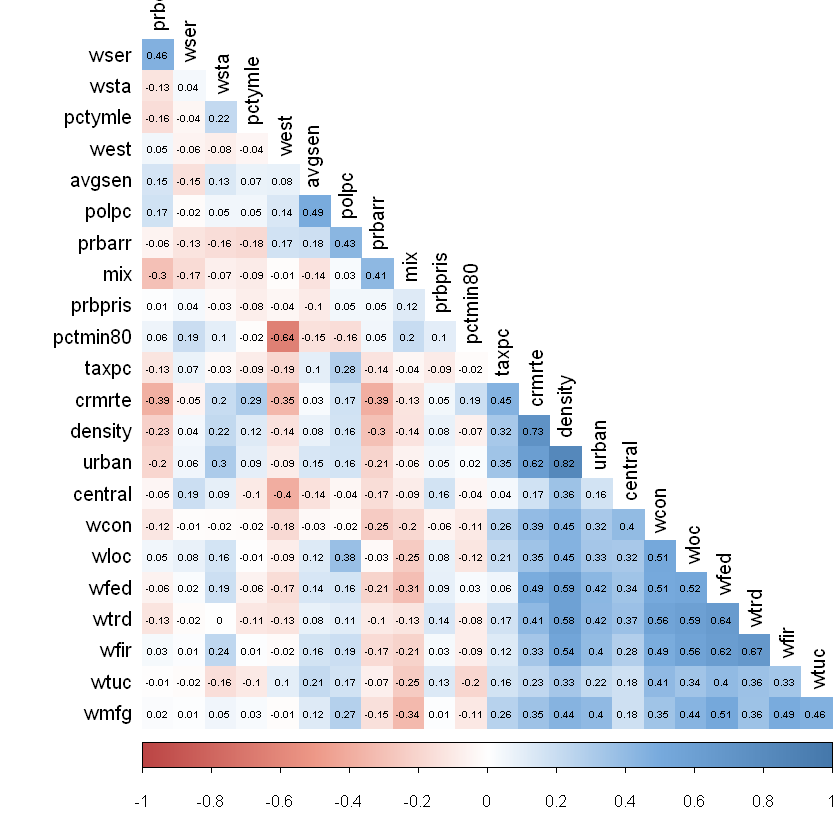

In [6]:
#install.packages('corrplot')
crime$prbconv<-as.numeric(crime$prbconv)
library(corrplot)
cor_matrix = cor(crime[c('crmrte', 'prbarr','prbconv', 'prbpris','avgsen','polpc','density','taxpc','west','central',
                          'urban','pctmin80','wcon','wtuc','wtrd','wfir','wser','wmfg','wfed','wsta','wloc','mix','pctymle')], 
                          use = "complete.obs")
# Use heatmap to illustrate
col <- colorRampPalette(c("#BB4444", "#EE9988", "#FFFFFF", "#77AADD", "#4477AA"))
corrplot(cor_matrix, method="color", col=col(500), type='lower',
order="hclust",
addCoef.col = "black", # Add coefficient of correlation
number.cex=0.5,
text.cex=0.5,
tl.col="black", tl.srt=90, #Text label color and rotation
# hide correlation coefficient on the principal diagonal
diag=FALSE
)

## 2. A Model Building Process

### Model 1 - Base Model
Our first model will use population density as the key independent variable and a determinant of crime. Let's run an EDA - We start by handling the missing values. We then do a univariate analysis on the outcome variable and independent variable.

Crime rate - The histogram and box plot show that the data is skewed towards the lower end of the distribution. This indicates that most counties have low crime rates. The outliers are on the higher end and seem reasonable so we will keep them. 

Density - The graphs indicate a spike in data on the lower end of distribution. This means most counties have very low population density. There are outliers on the higher end but they seem reasonable

Log transformation on the outcome variable - Given the skewness of  outcome variable, we will use log transformation on it to reduce skewness and improve data distribution

. 


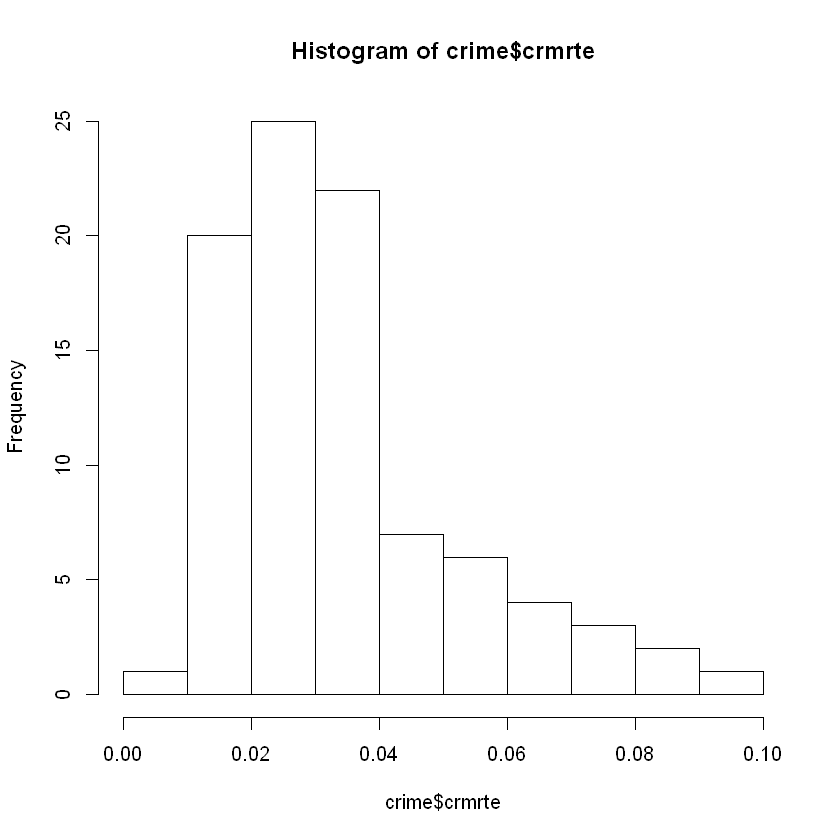

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.005533 0.020927 0.029986 0.033400 0.039642 0.098966 

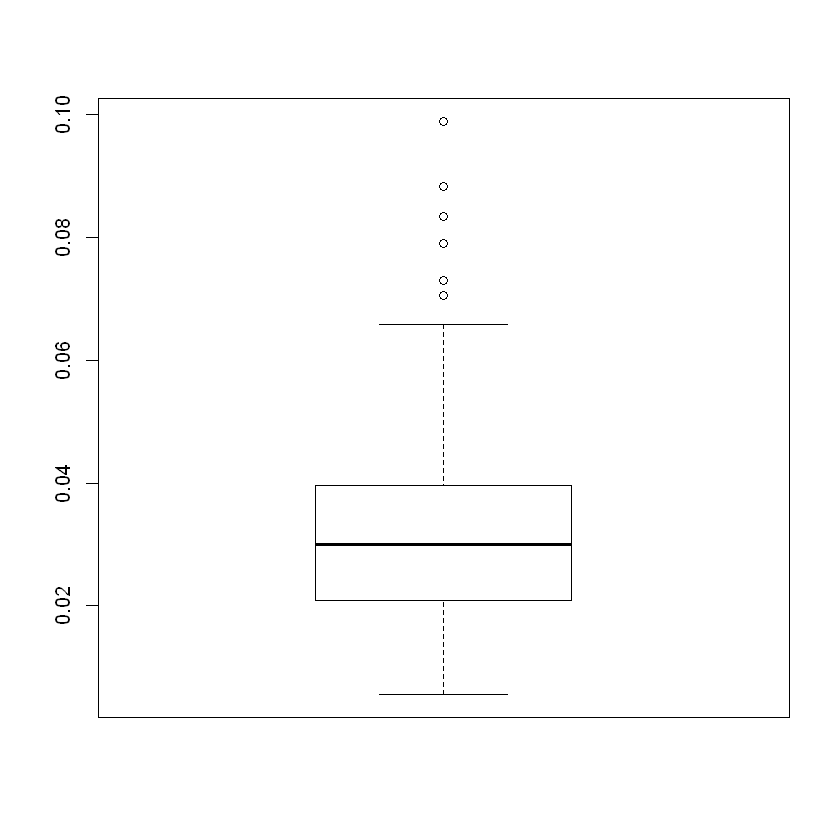

In [7]:
hist(crime$crmrte)
boxplot(crime$crmrte)
summary(crime$crmrte)

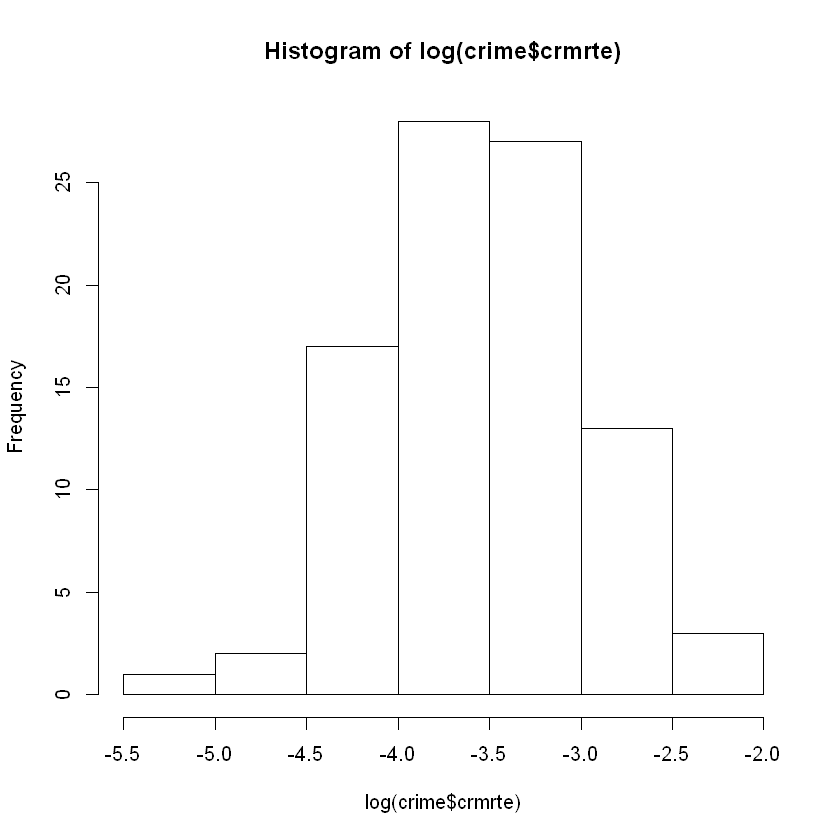

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -5.197  -3.867  -3.507  -3.544  -3.228  -2.313 

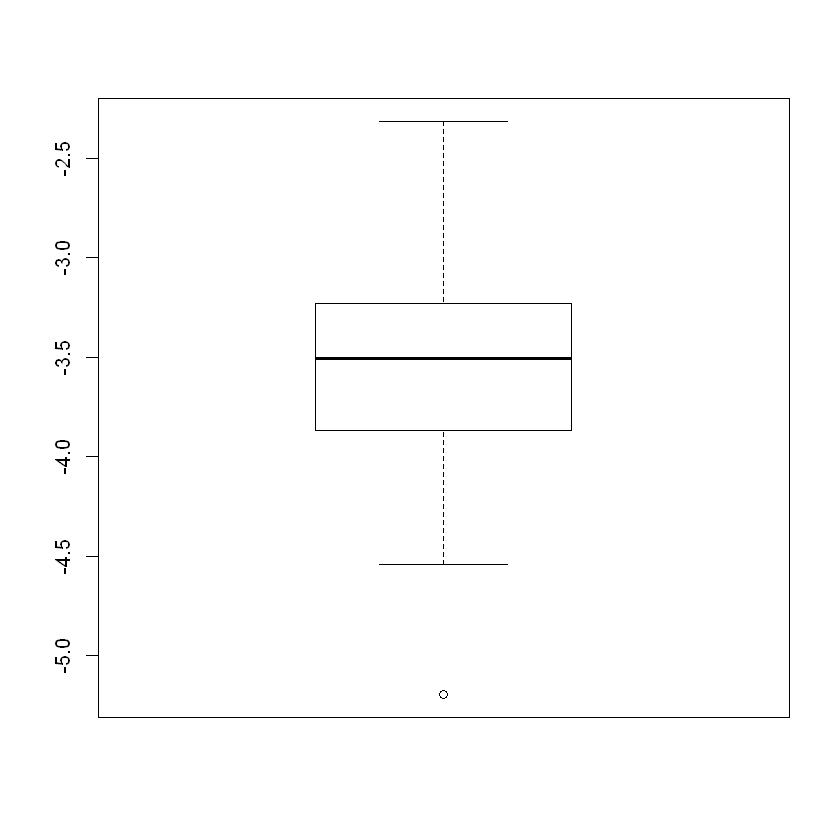

In [8]:
hist(log(crime$crmrte))
boxplot(log(crime$crmrte))
summary(log(crime$crmrte))

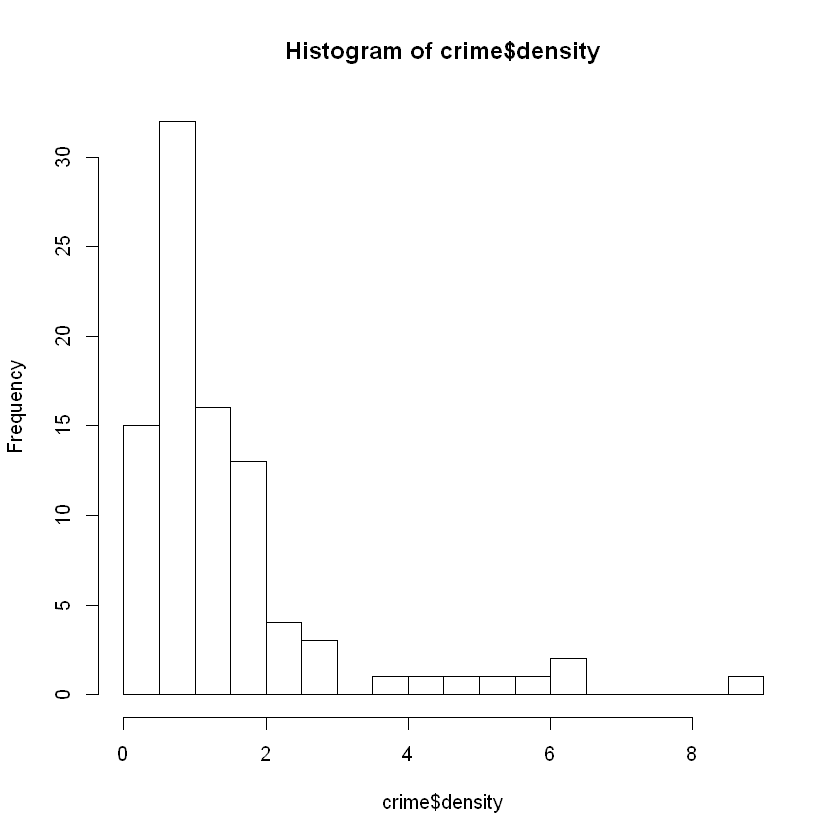

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00002 0.54741 0.96226 1.42884 1.56824 8.82765 

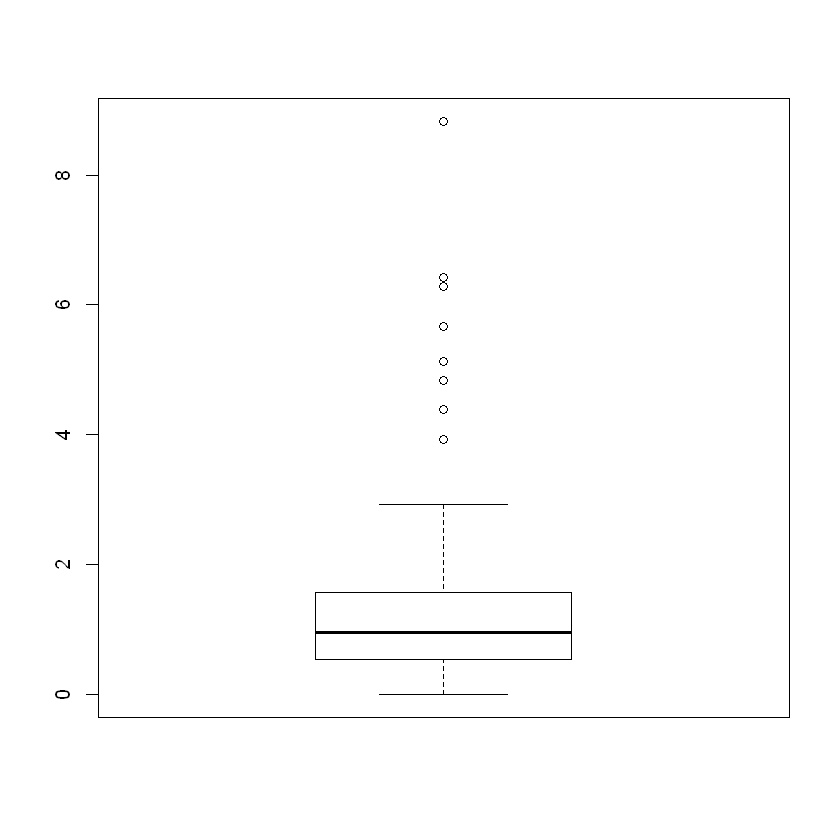

In [9]:
hist(crime$density,breaks=20)
boxplot(crime$density)
summary(crime$density)


Call:
lm(formula = log(crime$crmrte) ~ crime$density)

Coefficients:
  (Intercept)  crime$density  
      -3.8705         0.2285  


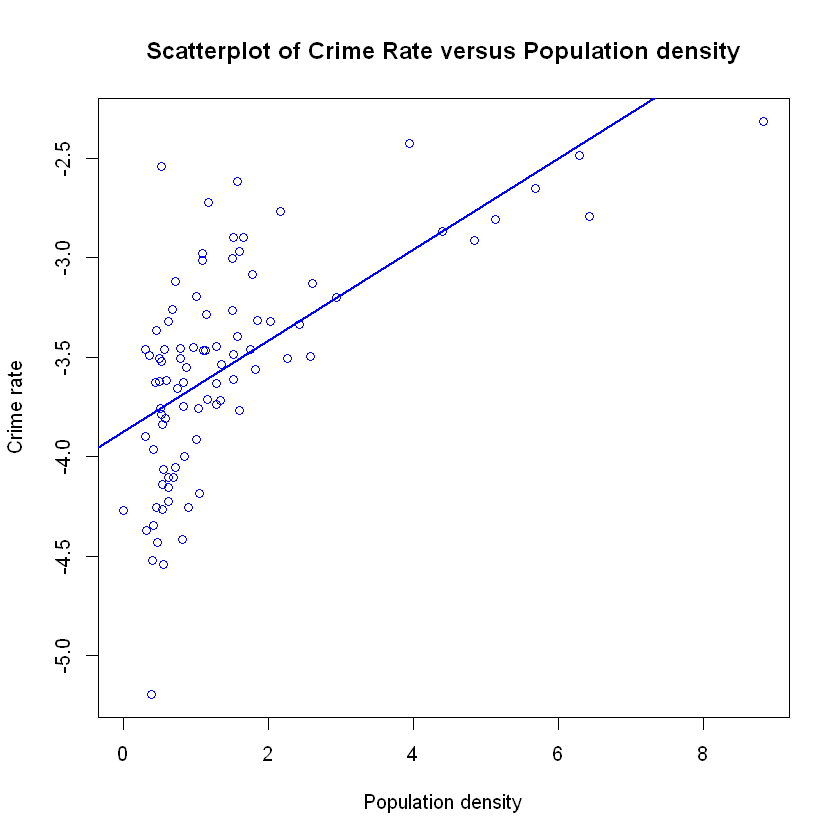

In [9]:
model1 <- lm(log(crime$crmrte)~crime$density)
model1
plot(crime$density, log(crime$crmrte), col="blue", main="Scatterplot of Crime Rate versus Population density",
     xlab="Population density",ylab="Crime rate")
abline(model1,col="blue",lwd=2)

In [72]:
summary(model1)


Call:
lm(formula = crime$crmrte ~ crime$density)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.018423 -0.009392 -0.002907  0.004790  0.053922 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.0204632  0.0018711   10.94  < 2e-16 ***
crime$density 0.0090542  0.0009013   10.05 2.57e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.01295 on 89 degrees of freedom
Multiple R-squared:  0.5314,	Adjusted R-squared:  0.5261 
F-statistic: 100.9 on 1 and 89 DF,  p-value: 2.573e-16


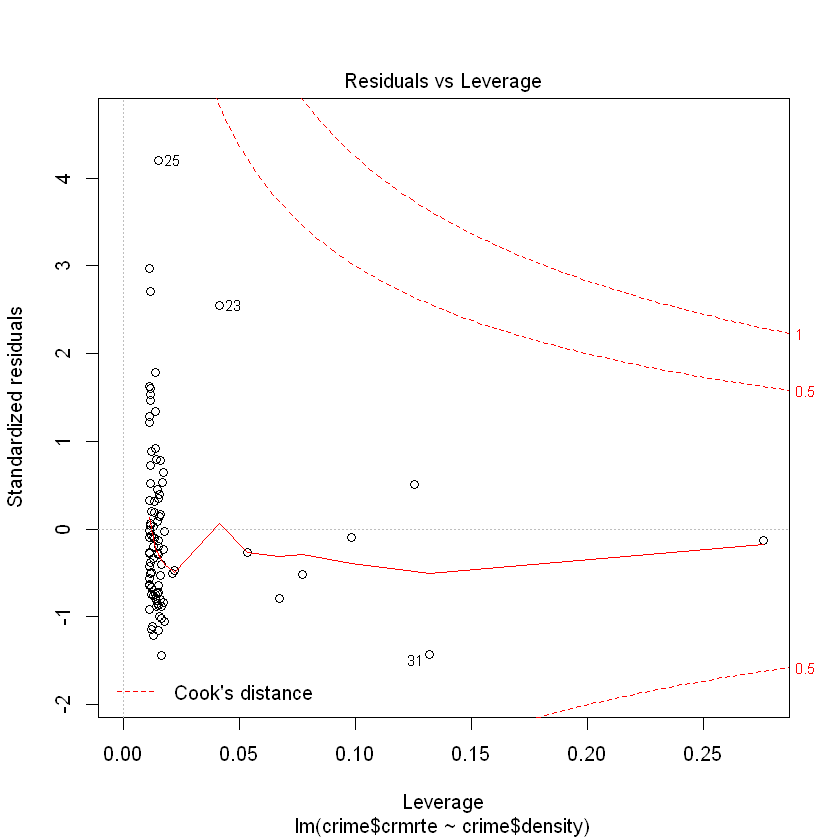

In [73]:
plot(model1,5)

The log transformation is negatively affecting the model fit and the effect of outliers. It is leading to a lower
R squared value of 0.46 compared to a model with no log transformation (R-squared > 0.5). So we will use the model without the log transformation


Call:
lm(formula = crime$crmrte ~ crime$density)

Coefficients:
  (Intercept)  crime$density  
     0.020463       0.009054  


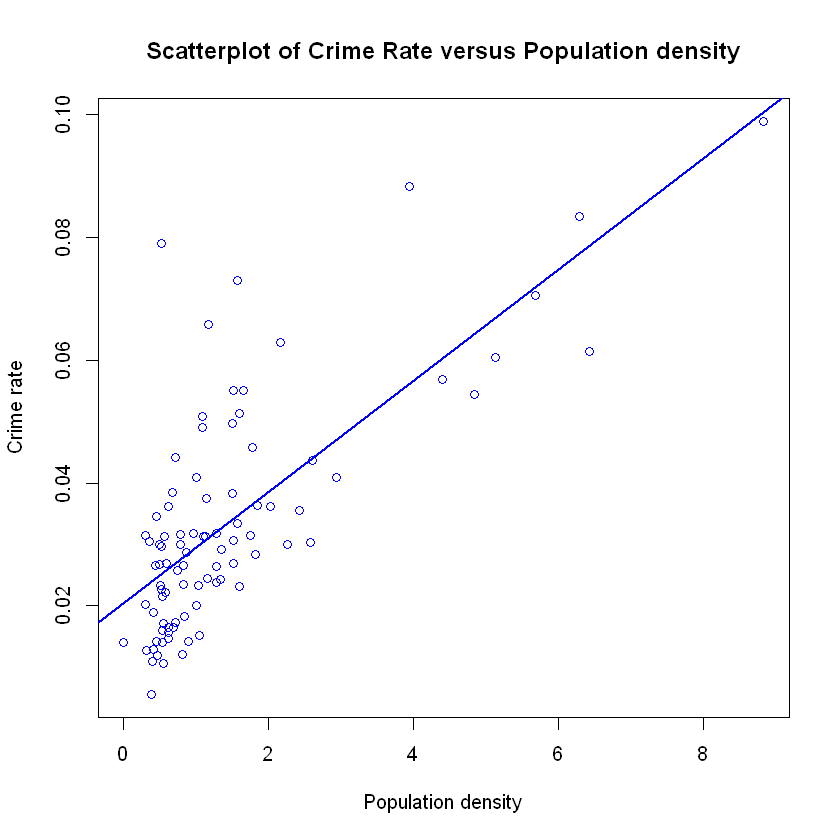

In [12]:
model1 <- lm(crime$crmrte~crime$density)
model1
plot(crime$density, crime$crmrte, col="blue", main="Scatterplot of Crime Rate versus Population density",
     xlab="Population density",ylab="Crime rate")
abline(model1,col="blue",lwd=2)

In [13]:
summary(model1)


Call:
lm(formula = crime$crmrte ~ crime$density)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.018423 -0.009392 -0.002907  0.004790  0.053922 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.0204632  0.0018711   10.94  < 2e-16 ***
crime$density 0.0090542  0.0009013   10.05 2.57e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.01295 on 89 degrees of freedom
Multiple R-squared:  0.5314,	Adjusted R-squared:  0.5261 
F-statistic: 100.9 on 1 and 89 DF,  p-value: 2.573e-16


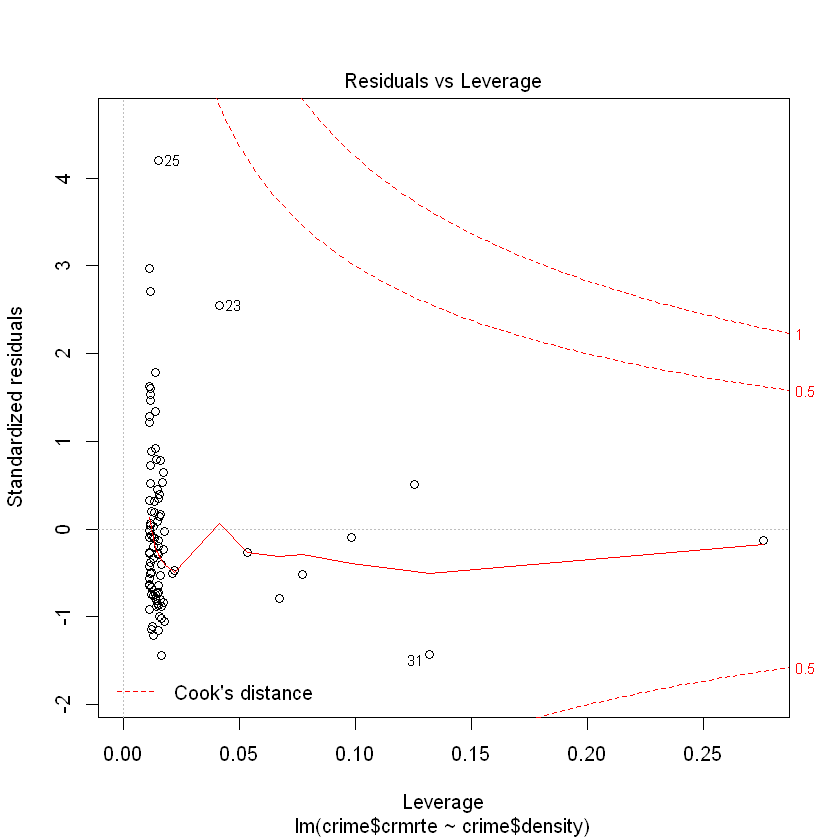

In [14]:
plot(model1,5)

### Model 2 - Maximalist model
In our next model, we will include all variables that have strong correlation with crime rate. From the correlation heatmap above we choose these dependent variables that have correlation over 0.1 with the outcome variable. These are variables we will use in our model:
* density
* prbarr
* prbconv
* wcon
* wloc
* wfed
* wtuc
* wmfg
* mix
* wsta
* pctymle
* west
* central
* polpc

EDA - We will start with univariate analysis on metric variables and then run the model.

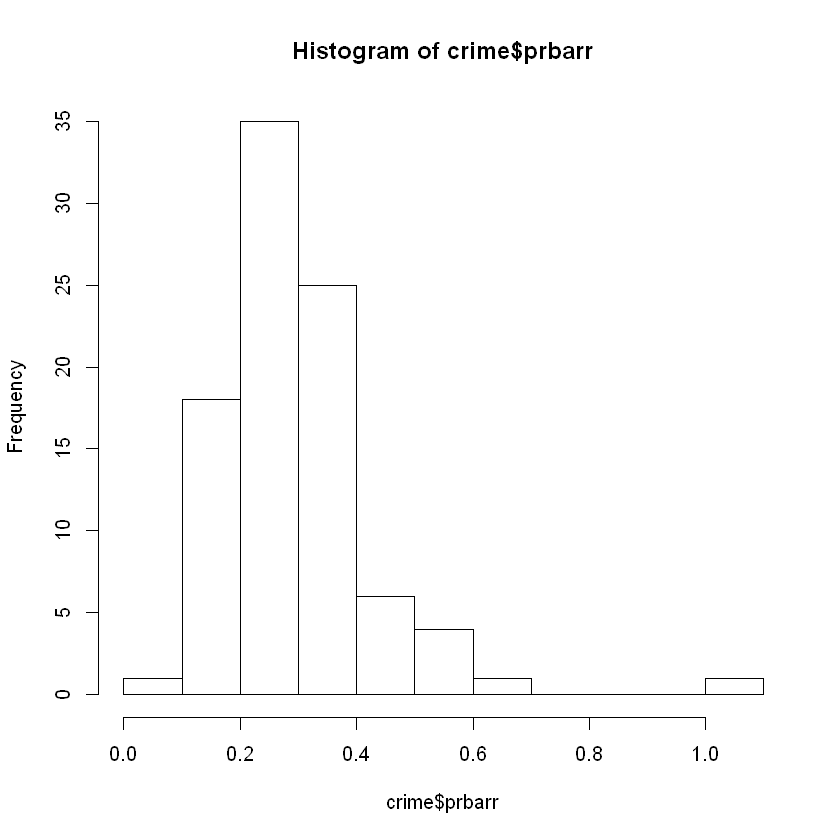

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.09277 0.20568 0.27095 0.29492 0.34438 1.09091 

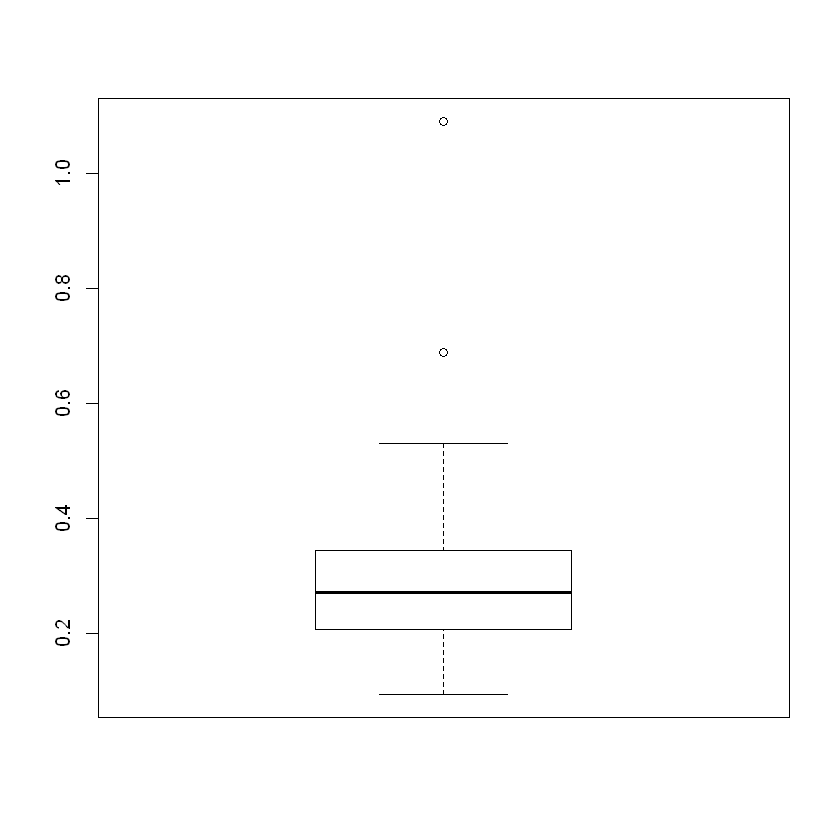

In [15]:
hist(crime$prbarr)
boxplot(crime$prbarr)
summary(crime$prbarr)

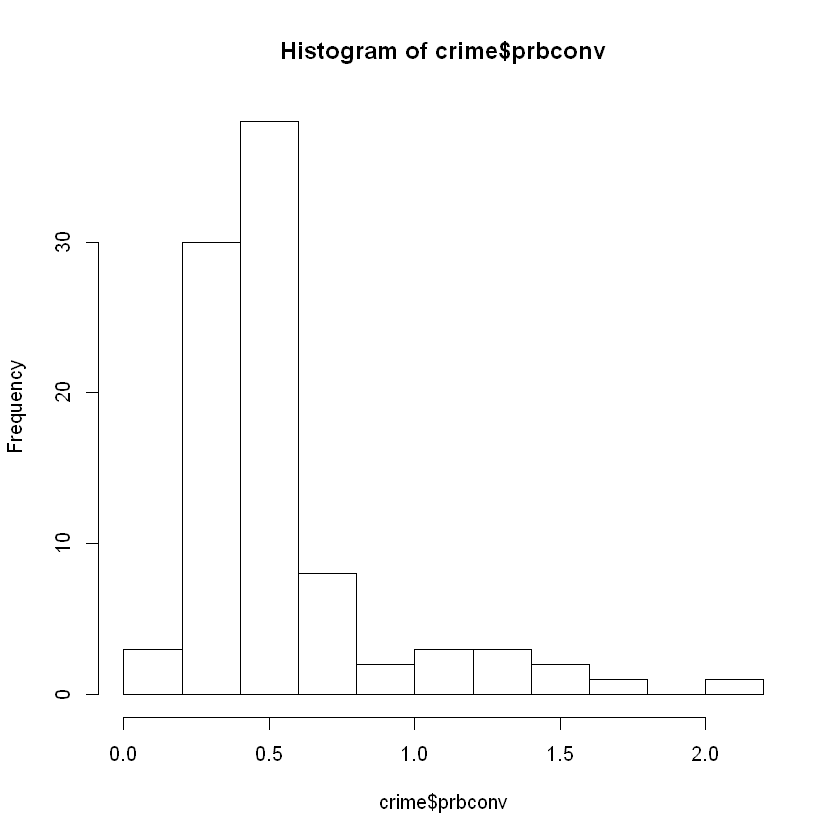

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.06838 0.34541 0.45283 0.55128 0.58886 2.12121 

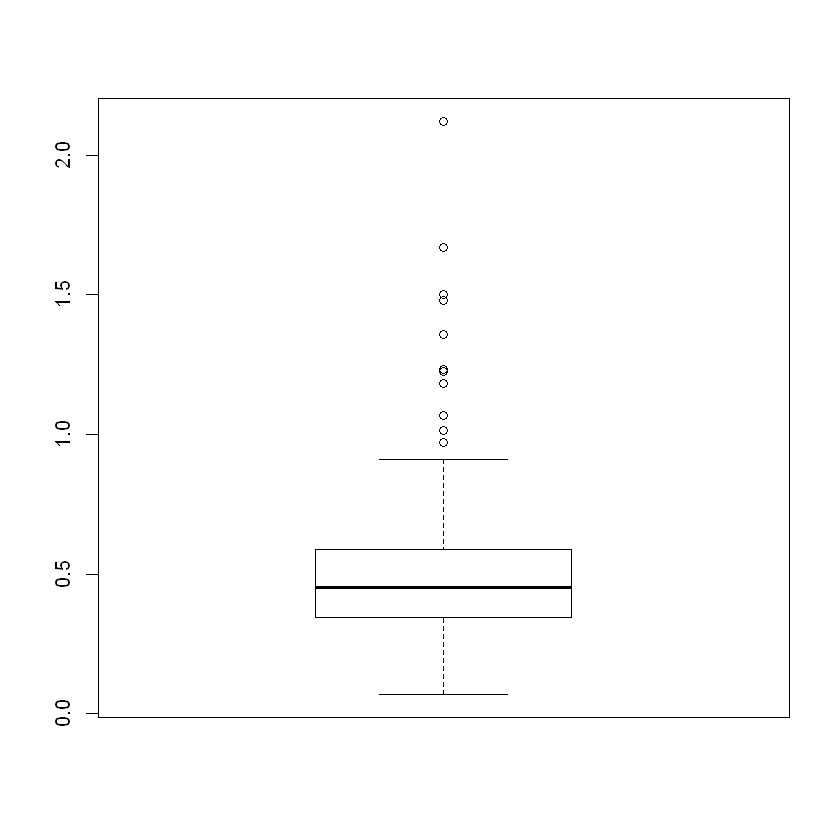

In [16]:
hist(crime$prbconv)
boxplot(crime$prbconv)
summary(crime$prbconv)

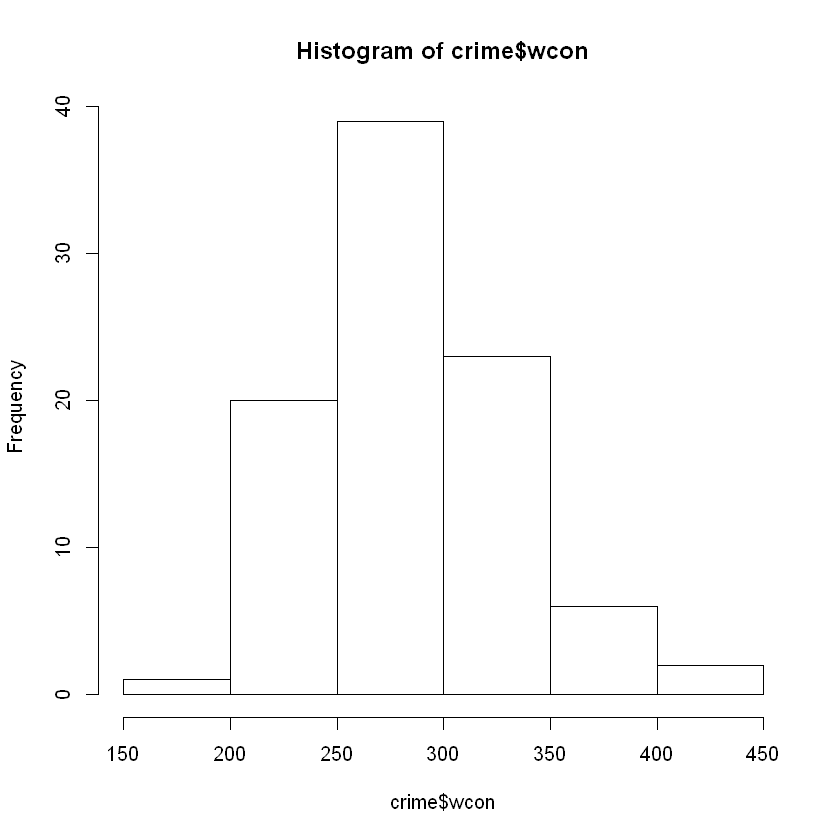

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  193.6   250.8   281.4   285.4   314.8   436.8 

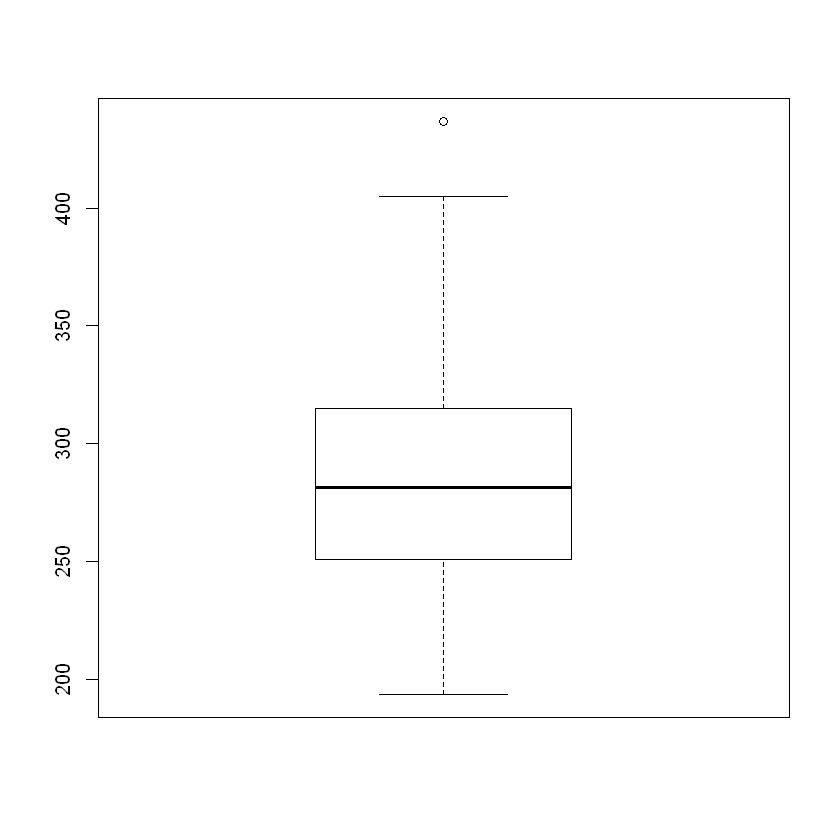

In [17]:
hist(crime$wcon)
boxplot(crime$wcon)
summary(crime$wcon)

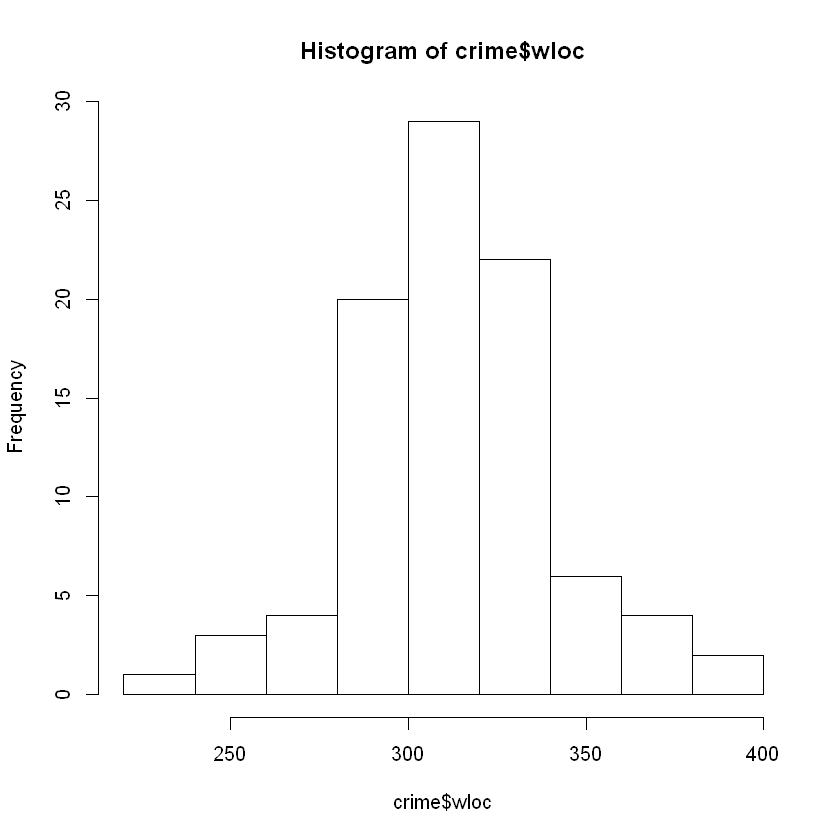

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  239.2   297.3   308.1   312.7   329.2   388.1 

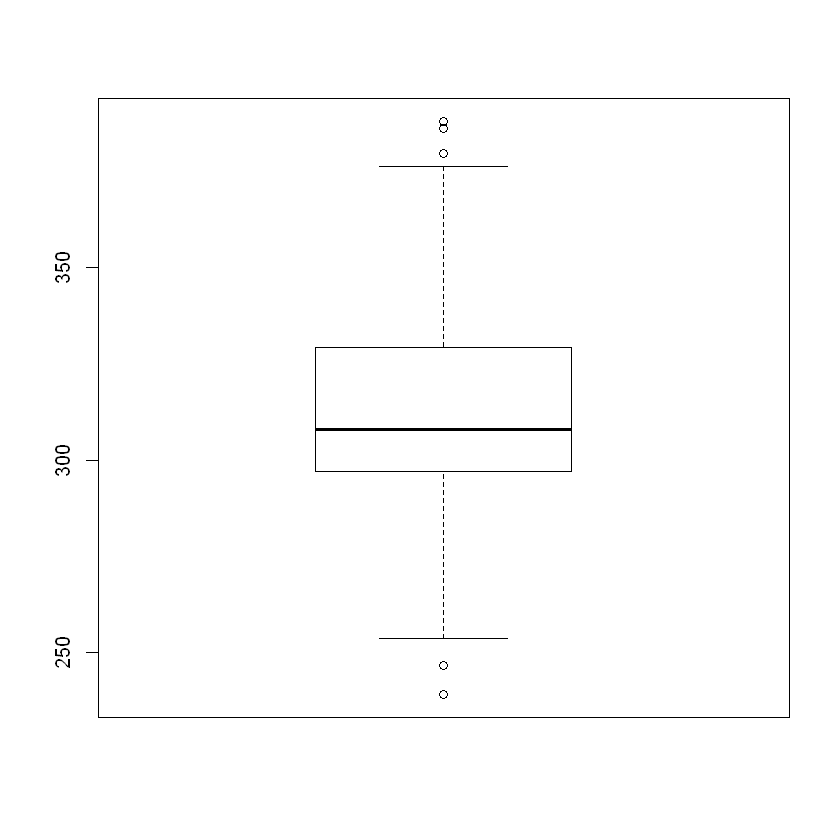

In [18]:
hist(crime$wloc)
boxplot(crime$wloc)
summary(crime$wloc)

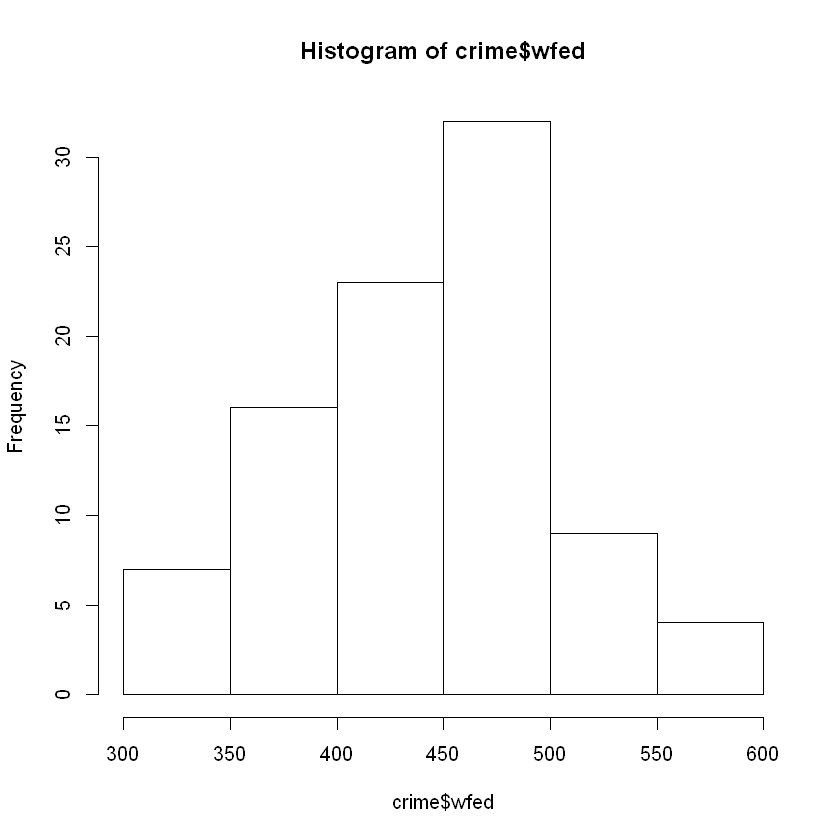

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  326.1   400.2   449.8   442.9   478.0   598.0 

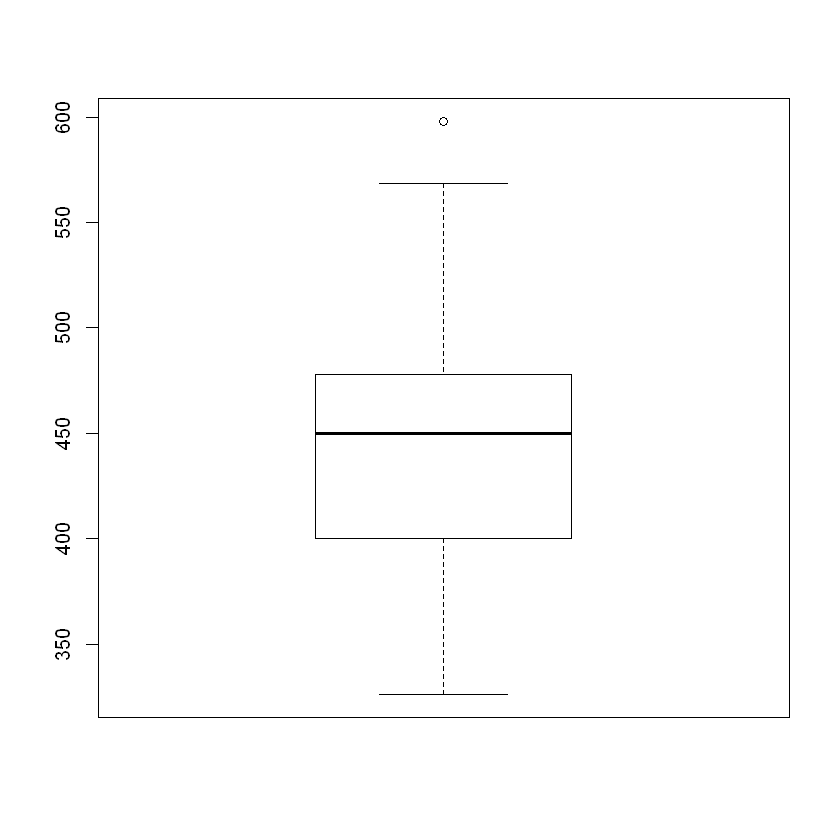

In [19]:
hist(crime$wfed)
boxplot(crime$wfed)
summary(crime$wfed)

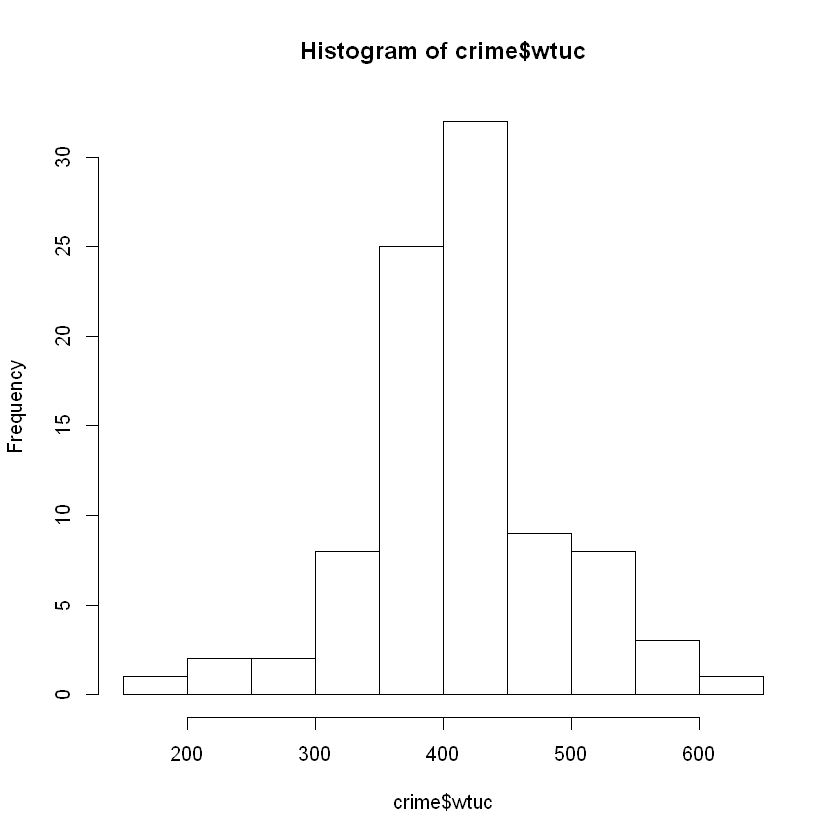

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  187.6   374.6   406.5   411.7   443.4   613.2 

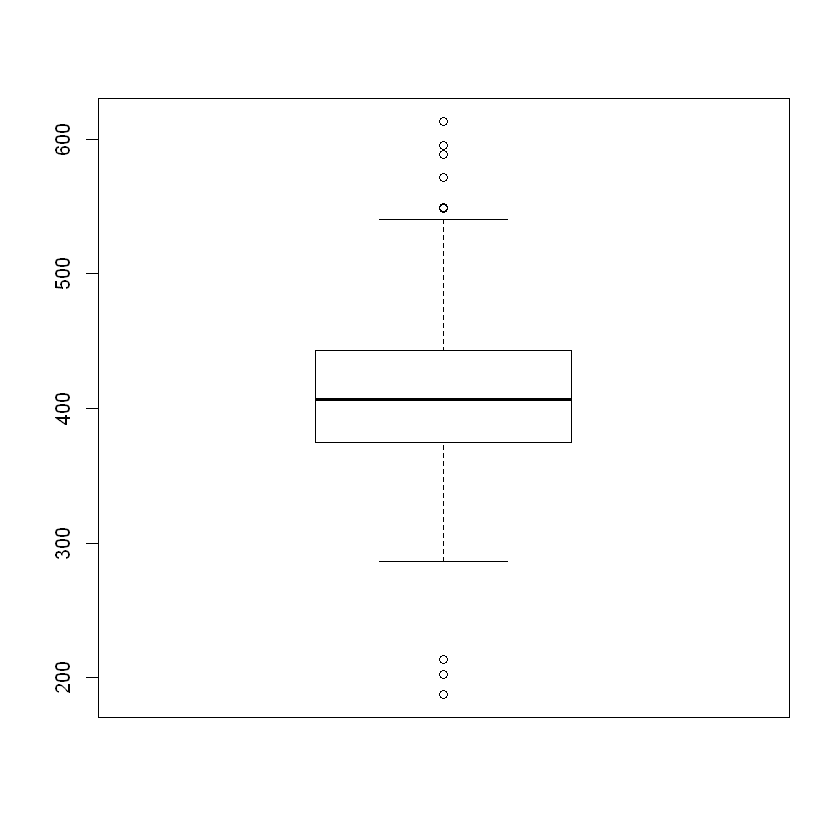

In [20]:
hist(crime$wtuc)
boxplot(crime$wtuc)
summary(crime$wtuc)

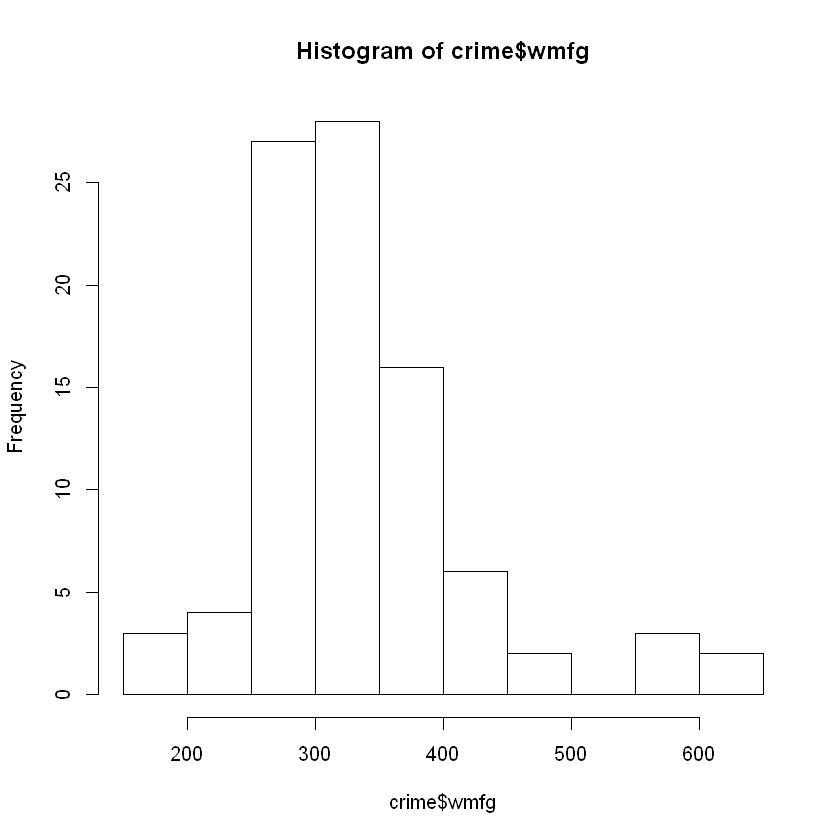

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  157.4   288.9   320.2   335.6   359.6   646.9 

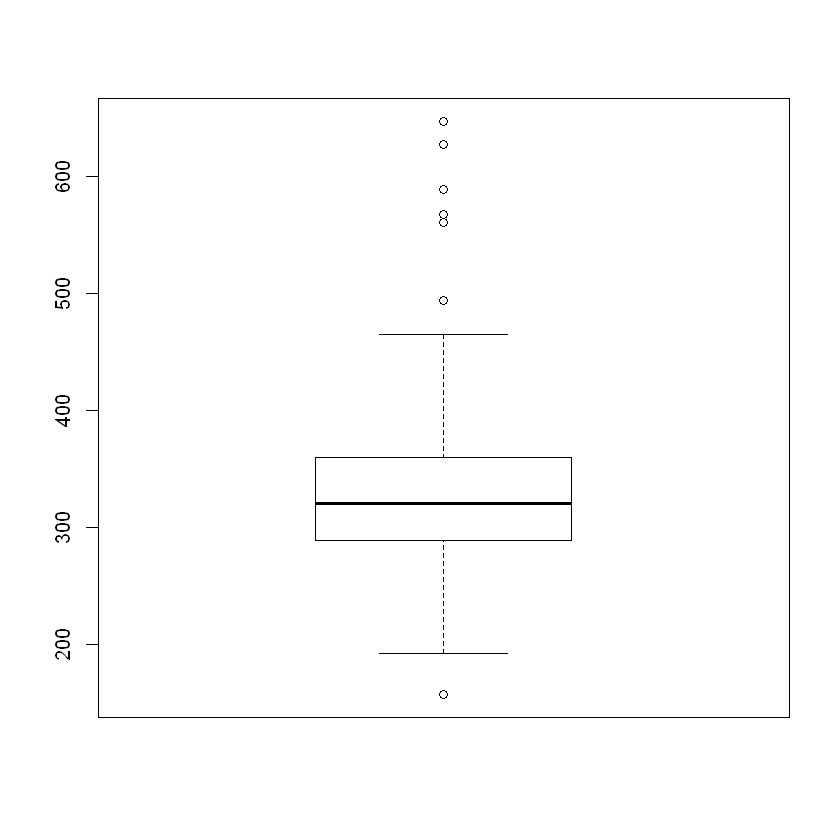

In [21]:
hist(crime$wmfg)
boxplot(crime$wmfg)
summary(crime$wmfg)

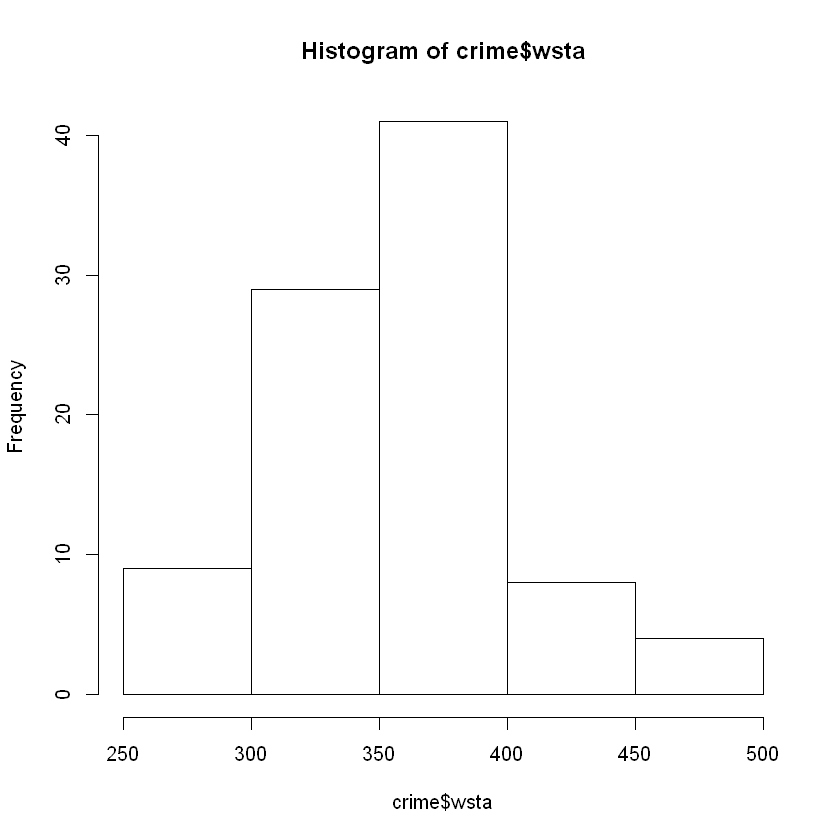

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  258.3   329.3   357.7   357.5   382.6   499.6 

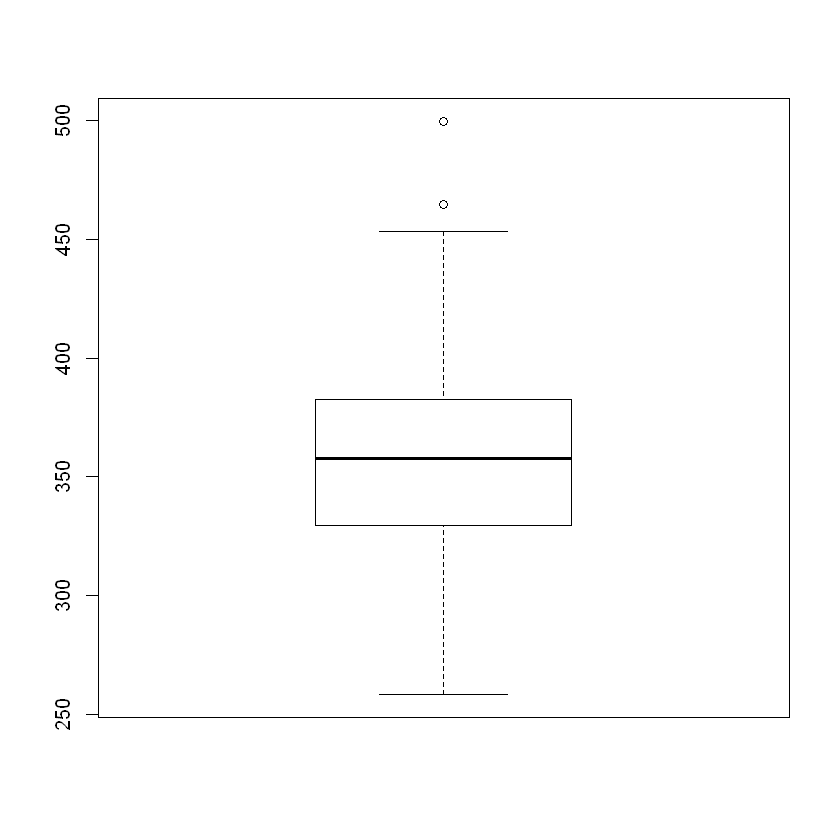

In [22]:
hist(crime$wsta)
boxplot(crime$wsta)
summary(crime$wsta)

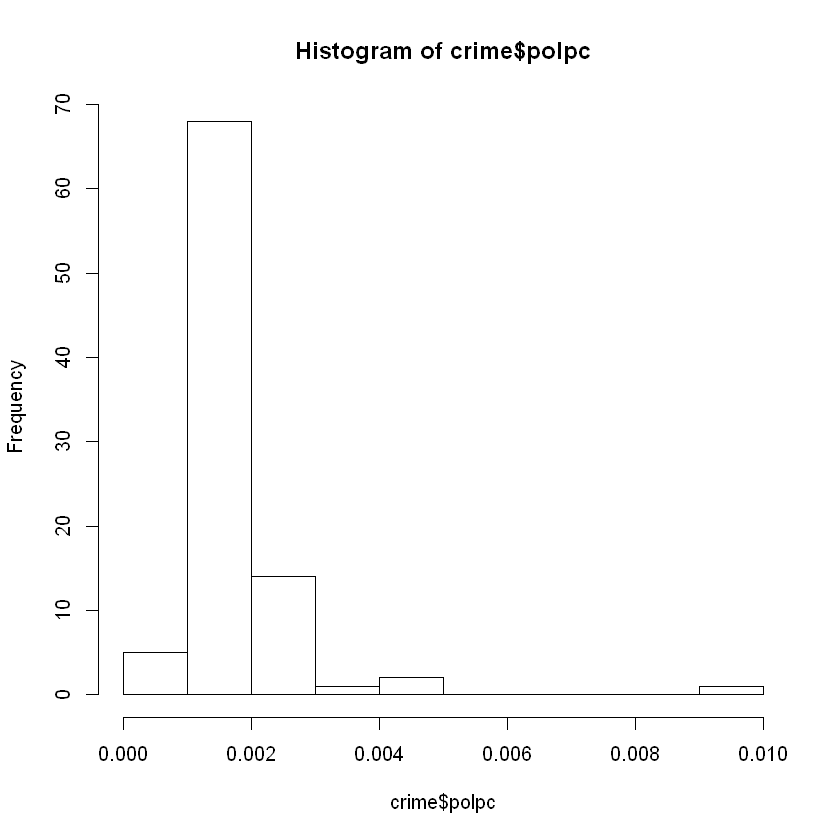

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
0.0007459 0.0012308 0.0014853 0.0017022 0.0018768 0.0090543 

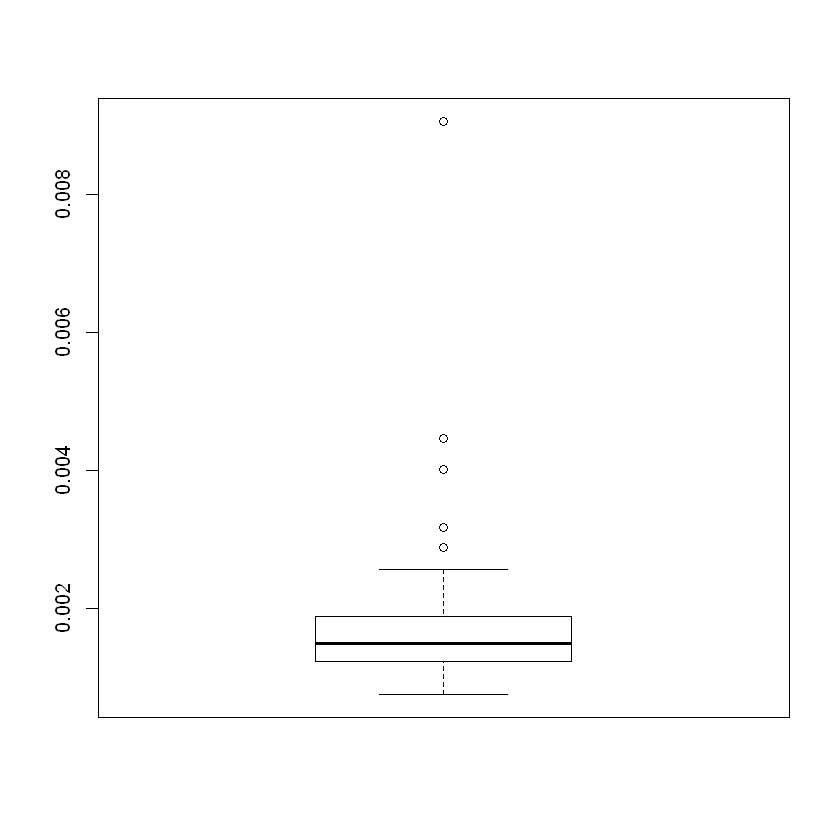

In [23]:
hist(crime$polpc)
boxplot(crime$polpc)
summary(crime$polpc)

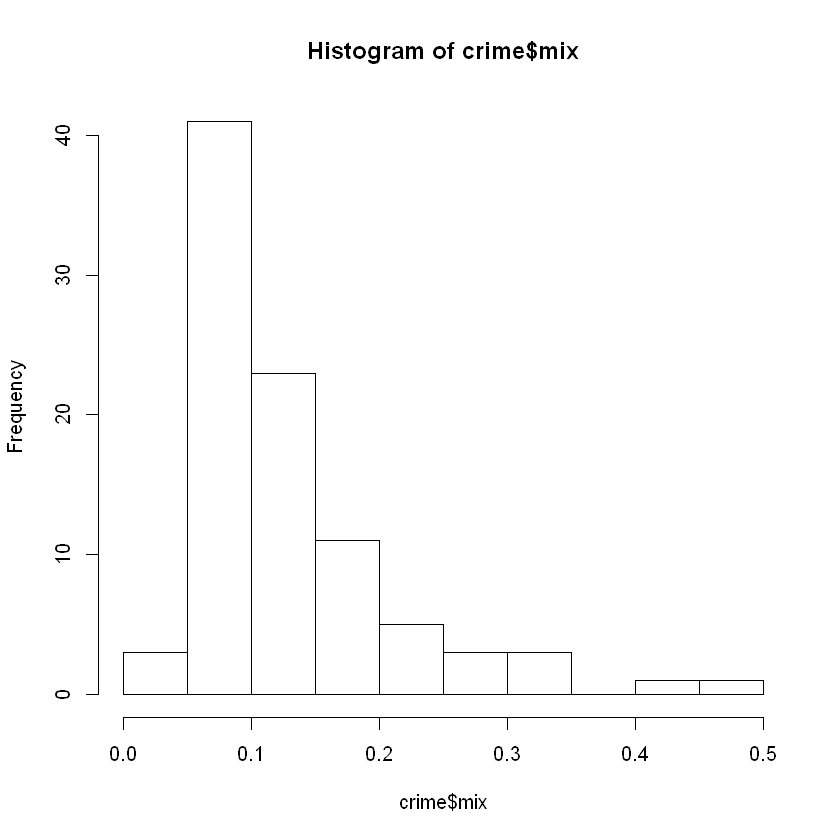

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.01961 0.08073 0.10186 0.12884 0.15175 0.46512 

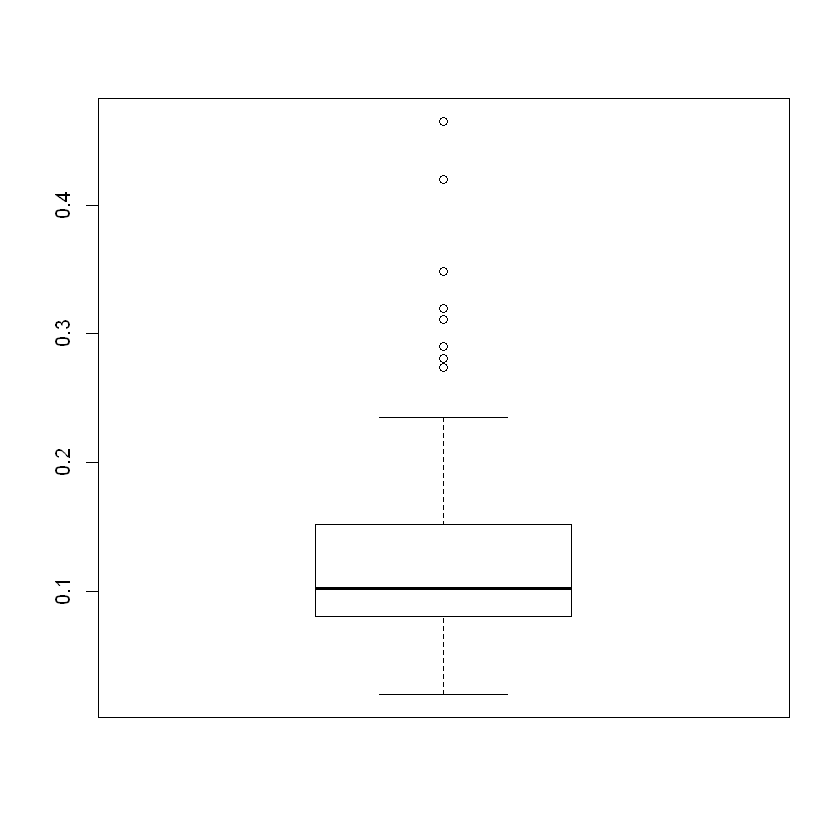

In [24]:
hist(crime$mix)
boxplot(crime$mix)
summary(crime$mix)

In [25]:
model2<-lm(crmrte~density+prbconv+central+polpc+west+prbarr+wcon+wloc+wfed+wtrd+wfir+wtuc+wmfg+mix+wsta+pctymle, 
           data=crime)

model2


Call:
lm(formula = crmrte ~ density + prbconv + central + polpc + west + 
    prbarr + wcon + wloc + wfed + wtrd + wfir + wtuc + wmfg + 
    mix + wsta + pctymle, data = crime)

Coefficients:
(Intercept)      density      prbconv      central        polpc         west  
  2.736e-02    5.803e-03   -1.756e-02   -8.532e-03    6.232e+00   -1.345e-02  
     prbarr         wcon         wloc         wfed         wtrd         wfir  
 -4.952e-02    2.099e-05    1.863e-05    3.111e-05    1.379e-05   -3.382e-05  
       wtuc         wmfg          mix         wsta      pctymle  
  5.115e-06   -2.493e-06   -2.976e-03   -1.777e-05    6.983e-02  


In [26]:
summary(model2)


Call:
lm(formula = crmrte ~ density + prbconv + central + polpc + west + 
    prbarr + wcon + wloc + wfed + wtrd + wfir + wtuc + wmfg + 
    mix + wsta + pctymle, data = crime)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0205567 -0.0063577  0.0001774  0.0040557  0.0310715 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.736e-02  1.823e-02   1.501 0.137700    
density      5.803e-03  9.586e-04   6.054 5.37e-08 ***
prbconv     -1.756e-02  3.307e-03  -5.310 1.11e-06 ***
central     -8.532e-03  2.382e-03  -3.582 0.000607 ***
polpc        6.232e+00  1.342e+00   4.643 1.45e-05 ***
west        -1.345e-02  2.491e-03  -5.401 7.71e-07 ***
prbarr      -4.952e-02  9.837e-03  -5.034 3.27e-06 ***
wcon         2.099e-05  2.817e-05   0.745 0.458522    
wloc         1.863e-05  5.102e-05   0.365 0.716014    
wfed         3.111e-05  2.524e-05   1.233 0.221651    
wtrd         1.378e-05  4.832e-05   0.285 0.776219    
wfir        -3.382e-05 

### Correlation matrix - A Focused Look
In further determining which variables within our model 2 would provide higher prediction powers for our model, we take a closer look at correlation matrix to determine each correlation with crmrte, and multicollinearity among these predictors.

Warning message in ind1:ind2:
"numerical expression has 2 elements: only the first used"Warning message in ind1:ind2:
"numerical expression has 3 elements: only the first used"Warning message in text.default(pos.xlabel[, 1], pos.xlabel[, 2], newcolnames, srt = tl.srt, :
""text.cex" is not a graphical parameter"Warning message in text.default(pos.ylabel[, 1], pos.ylabel[, 2], newrownames, col = tl.col, :
""text.cex" is not a graphical parameter"Warning message in title(title, ...):
""text.cex" is not a graphical parameter"

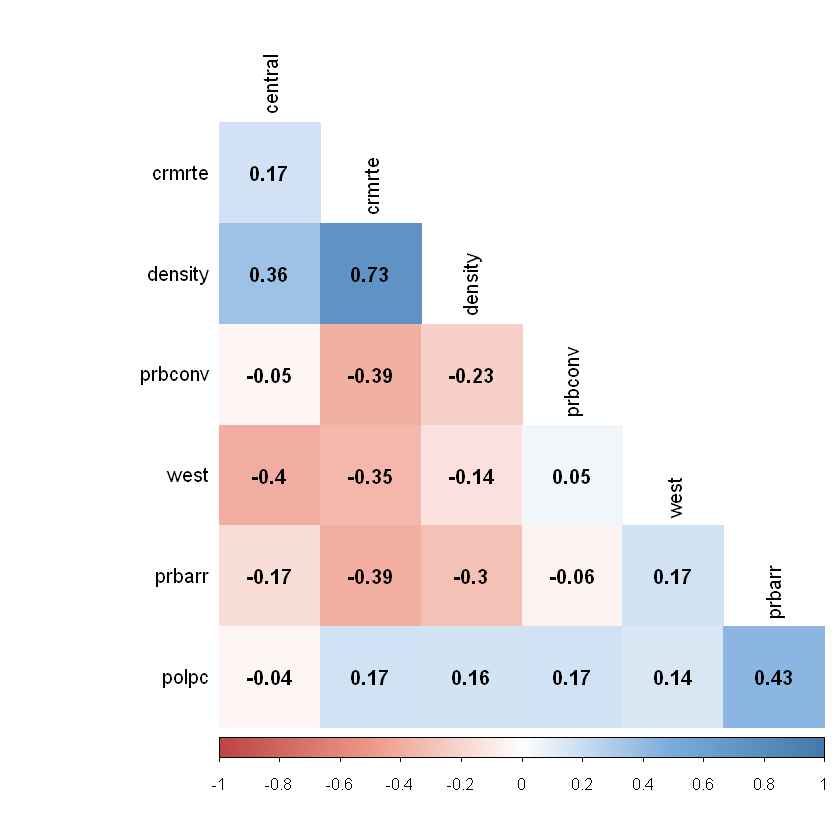

In [27]:
cor_matrix2 = cor(crime[c('crmrte','prbarr','prbconv','polpc','density','west','central')], 
                          use = "complete.obs")
# Use heatmap to illustrate
col <- colorRampPalette(c("#BB4444", "#EE9988", "#FFFFFF", "#77AADD", "#4477AA"))
corrplot(cor_matrix2, method="color", col=col(500), type='lower',
order="hclust",
addCoef.col = "black", # Add coefficient of correlation
number.cex=1,
text.cex=1,
tl.col="black", tl.srt=90, #Text label color and rotation
# hide correlation coefficient on the principal diagonal
diag=FALSE
)

### Model 3

In model 3, we take out variables that were suggested as statistically insignificant from model 2.  This will reduce the number of independent variables, while retaining prediction accuracy of the model. 

In [28]:
model3 <- lm(crmrte ~ density + prbconv + central + prbarr + west + polpc, data=crime)

In [29]:
summary(model3)


Call:
lm(formula = crmrte ~ density + prbconv + central + prbarr + 
    west + polpc, data = crime)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0236106 -0.0052506 -0.0006507  0.0045274  0.0300790 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.0456821  0.0034815  13.121  < 2e-16 ***
density      0.0062668  0.0007782   8.053 4.76e-12 ***
prbconv     -0.0185508  0.0029085  -6.378 9.29e-09 ***
central     -0.0080727  0.0022195  -3.637 0.000475 ***
prbarr      -0.0536658  0.0086402  -6.211 1.93e-08 ***
west        -0.0141026  0.0023466  -6.010 4.62e-08 ***
polpc        6.6962062  1.1831548   5.660 2.06e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.008831 on 84 degrees of freedom
Multiple R-squared:  0.7943,	Adjusted R-squared:  0.7796 
F-statistic: 54.06 on 6 and 84 DF,  p-value: < 2.2e-16


By dropping 10 predictive variables from model 2, we do not compromise the prediction accuracy of the model as the adjusted R-squared rises slightly from 0.7724 to 0.7796 

### Model 4
In model 4, we drop central and polpc from model3, based on the following:
i) central and polpc have lowest correlation with crmrte.  
ii) central has high collinearity with density (corr = 0.36)
    and polpc has high collinearity with prbarr (corr = 0.43)

In [30]:
model4 <- lm(crmrte ~ density + prbconv + prbarr + west, data=crime)

In [31]:
summary(model4)


Call:
lm(formula = crmrte ~ density + prbconv + prbarr + west, data = crime)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.020664 -0.006562 -0.000780  0.003281  0.043265 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.0409125  0.0042101   9.718 1.70e-15 ***
density      0.0072157  0.0008299   8.695 2.06e-13 ***
prbconv     -0.0135802  0.0033974  -3.997 0.000135 ***
prbarr      -0.0268425  0.0090028  -2.982 0.003729 ** 
west        -0.0095732  0.0026931  -3.555 0.000618 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.01095 on 86 degrees of freedom
Multiple R-squared:  0.6762,	Adjusted R-squared:  0.6611 
F-statistic:  44.9 on 4 and 86 DF,  p-value: < 2.2e-16


Degrees of freedom increases to 86, while model accuracy drops from 0.7796  to 0.6611 

### Model 5
In model 5, we drop the variable "west" from model 4, as west (and also central) are location-specific variables which are not practical variables in formulating our judicial campaign.  

Based on this practical significance, we choose to drop west rather than prbarr, even though prbarr is less statistically significant when compared to density, west, and prbconv.

In [32]:
model5 <-lm(crmrte ~ density + prbarr + prbconv, data=crime)

In [33]:
summary(model5)


Call:
lm(formula = crmrte ~ density + prbarr + prbconv, data = crime)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.020097 -0.007930 -0.003335  0.004743  0.045463 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.0396457  0.0044667   8.876 8.07e-14 ***
density      0.0074657  0.0008804   8.479 5.22e-13 ***
prbarr      -0.0311646  0.0094981  -3.281 0.001489 ** 
prbconv     -0.0140069  0.0036152  -3.874 0.000207 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.01166 on 87 degrees of freedom
Multiple R-squared:  0.6286,	Adjusted R-squared:  0.6158 
F-statistic: 49.09 on 3 and 87 DF,  p-value: < 2.2e-16


Model 5 is believed to have 3 predictive variables of statistical and practical significance with 87 degree of freedom and adjusted R-squared of 0.6158

## 3. An Assessment of the CLM Assumptions

For all of our models, we have kept the Classical Linear Model (CLM) assumptions in mind. To illustrate how, below is an example with the complete assessment of Model 5 (our selected model).

### Model 5 - CLM Assumptions

#### 1. Linear population model

The assumption here is that the TRUE relationship between crime rate and population density is linear i.e. the model is correctly specified. This assumption is not often justified convincingly, and statements used to justify the assumption may reflect the following "that's what everybody does". Justifying this assumption more clearly requires more inherent knowledge of the dataset and the variables at play.

#### 2. Random Sampling

If the sampling is not i.i.d, the estimation and inference will be substantially affected if it is not taken into account. 

In our case, data is collected from Cornwell and Trumball study for a selection of counties in North Carolina. It includes data collected from FBI's Uniform Crime Reports, North Carolina Department of Correction, census data, FBI's police agency employee counts, North Carolina Employment Security Commission.

There are 100 counties in the state of North Carolina. Our dataset has data for 91 unique counties. This will be considered a representative sample for the state and as being appropriate for our analysis.

#### 3. No perfect multicollinearity

In this assumption, no one regressor can be equal to a linear combination of other regressors. 

For a given predictor (p), multicollinearity can be assessed by computing a score called the variance inflation factor (or VIF), which measures how much the variance of a regression coefficient is inflated due to multicollinearity in the model. Any VIF of 10 or more provides evidence of serious multicollinearity.

In [34]:
vif(model5)

density   prbarr  prbconv 
1.177116 1.120015 1.073565

In our model, the VIF values of our variables are not large and don't compromise the model accuracy.

#### 4. Zero-conditional mean

From this assumption onwards, we begin looking at the diagnostic plots

The linear function is a conditional expectation which exists and is unique. This means that there is no functional relationship between x and u. We will analyze this by plotting residuals versus fitted values below. 

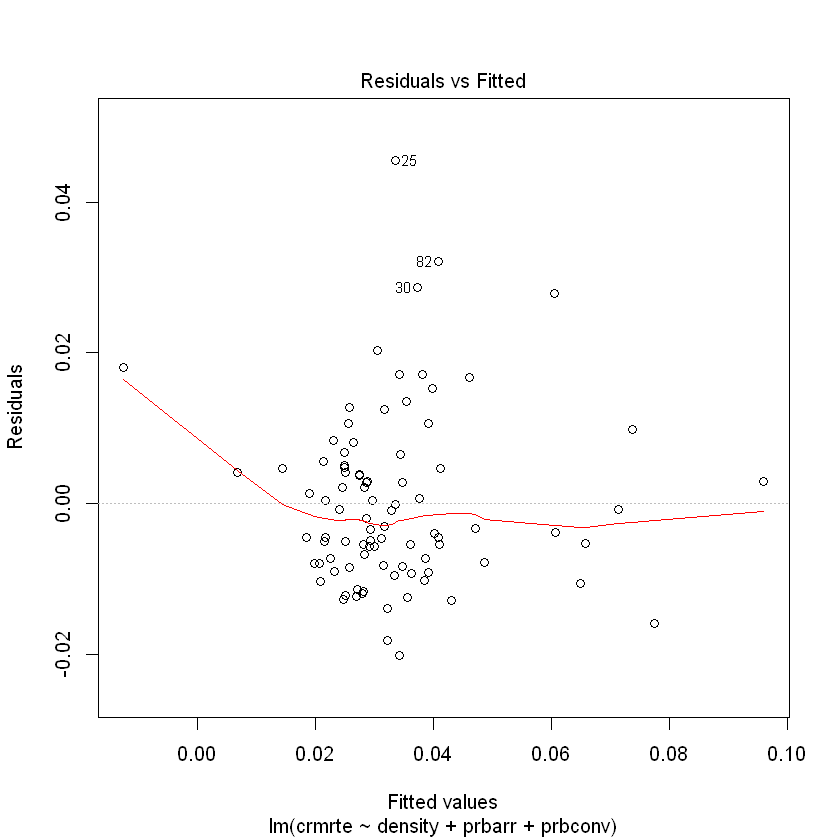

In [35]:
plot(model5, which = 1)

A parabolic shape generally indicates clear deviation from the zero conditional mean. Our plot however does not follow that pattern and shows a slightly uniform deviation. 

#### 5. Homoscedasticity

Homoscedasticity describes a situation in which the error term is the same across all values of the independent variables.
Our residuals versus fitted values plot indicates heteroskedasticity - the band seems to have uneven thickness.

We can analyze this further from another diagnostic plot: scale-location plot

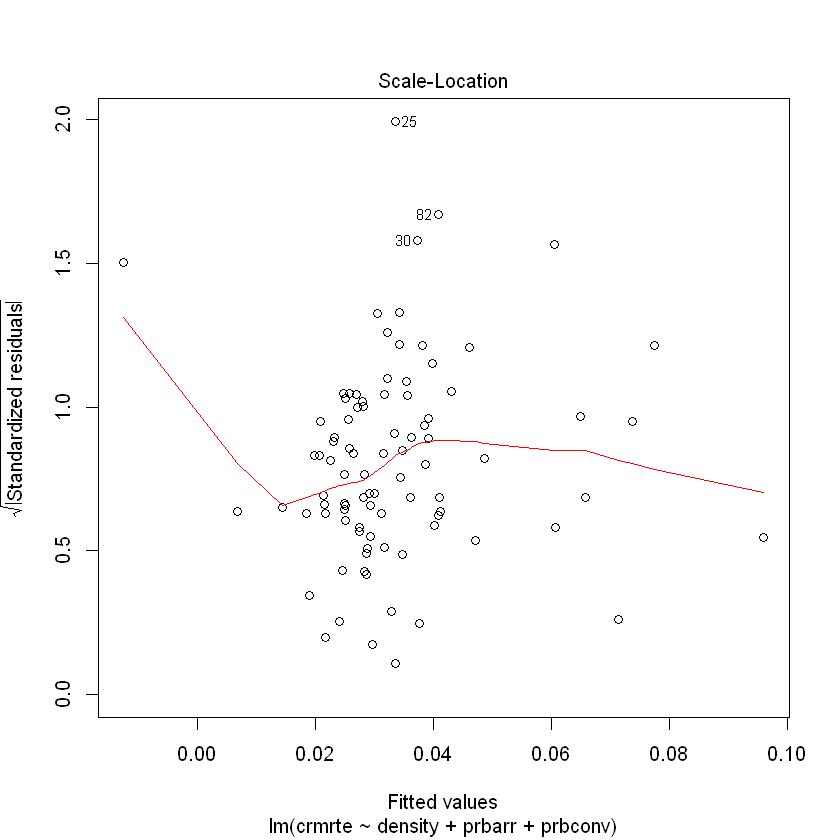

In [36]:
plot(model5, which = 3)

Due to the evidence above, we will proceed with robust standard errors.

#### 6. Normality of Errors

The normality of errors assumption is needed for the error rates we are willing to accept when making decisions about the process. If the random errors are not from a normal distribution, incorrect decisions will be made more or less frequently than the stated confidence levels for our inferences indicate.

To check for normality of errors, we can look at another diagnostic plot: the Normal Q-Q plot

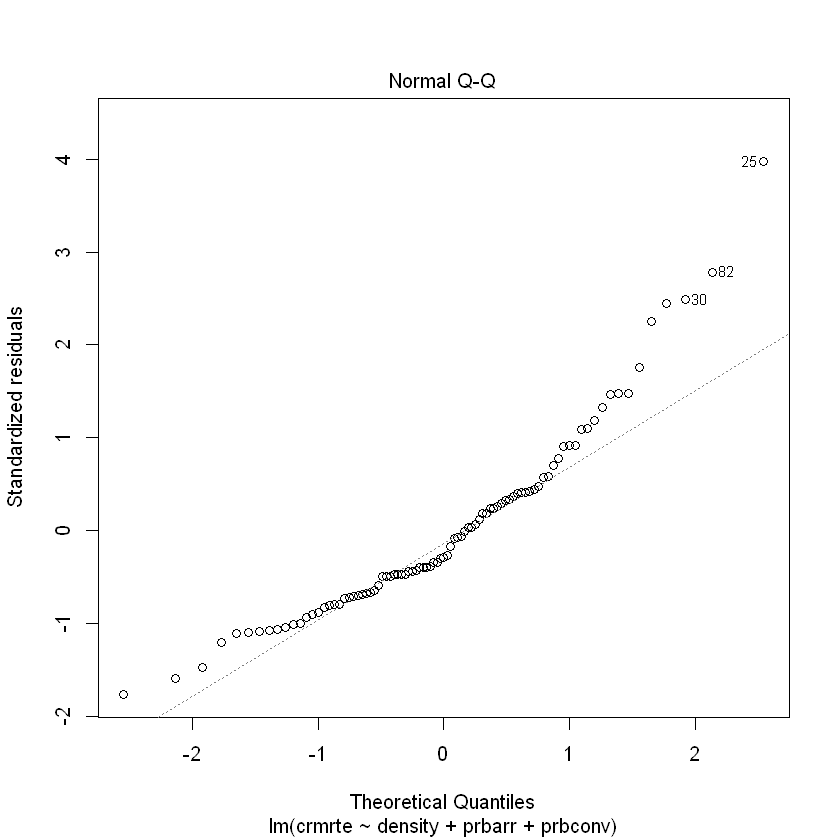

In [37]:
plot(model5, which = 2)

In addition to the normal Q-Q plot, we can analyze the residuals for the normality of errors assumption using a histogram of the residuals.

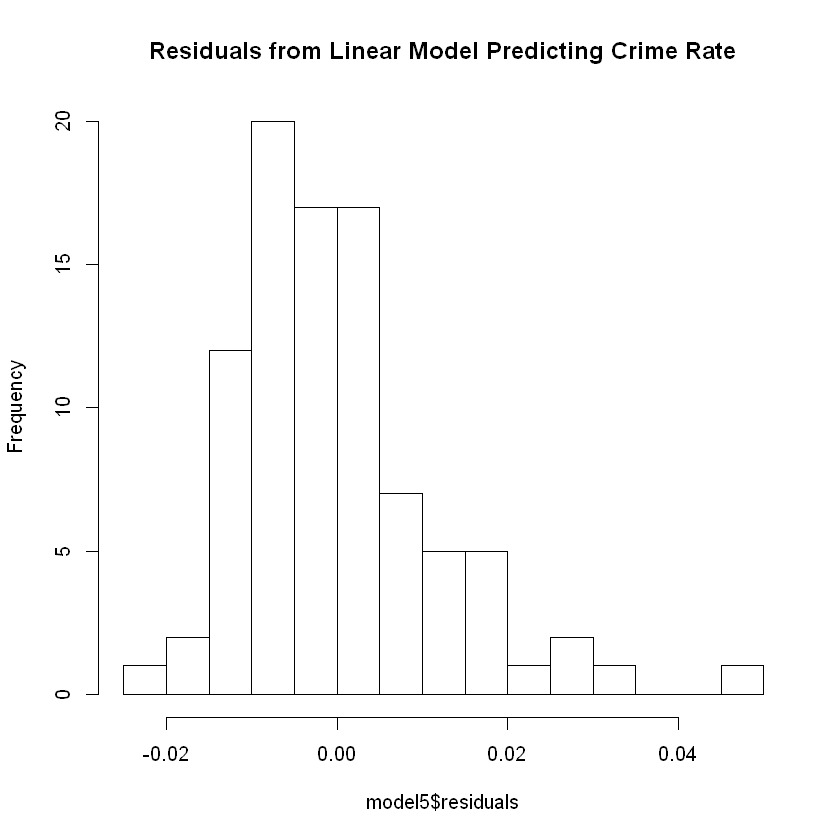

In [38]:
hist(model5$residuals, breaks = 20, main = "Residuals from Linear Model Predicting Crime Rate")

Both methods suggest we have a rightward skew. However, we have a large sample size, so the Central Limit Theorem (CLT) tells us that our estimators will have a normal sampling distribution. Our look at the histogram confirms that we aren't in a situation with an extreme skew, so our n=91 should be sufficient for the CLT

## 4. A Regression Table

In [39]:
stargazer(model1,model2,model3,model4,model5, type="text", omit.stat='f')


                                                  Dependent variable:                              
                    -------------------------------------------------------------------------------
                        crmrte                                  crmrte                             
                          (1)             (2)             (3)             (4)             (5)      
---------------------------------------------------------------------------------------------------
density                0.009***                                                                    
                        (0.001)                                                                    
                                                                                                   
density                                0.006***        0.006***        0.007***        0.007***    
                                        (0.001)         (0.001)         (0.001)         (0.001)    

The results from our estimation models are presented in the regression table above.

#### Model 1

Model1 one suggests that if population density increases by 1 percent, crime rate is estimated to rise by .009054 percent. As a single predicting variable, density is statistical significance in estimating crime rate with an adjusted R2 of 0.526.
This result highlights the tendency that higher population density areas may have more human to human interactions, leading to potentially higher rates of crime. Additionally, a higher cost of living in populous areas may lead to more financial strain and therefore an increased driving force behind certain crimes. 
With further analysis into each data distribution, we found that a one-standard-deviation move of density (1.5144) will cause a crime rate change of 0.0137, according to model1 prediction. Such a move is large compared to one-standard-deviation move of crime rate itself (0.01881). Therefore, we could conclude that density is a practical significance variable in predicting crime rate.

For a crime reduction policy, avoiding further economic development in condensed population areas would be an effective political tool.

#### Model 2

Although we include all variables with correlation over 0.1 with crime rate, only six variables indicate statistical significance. Adjusted R2 improves substantially from 0.526 to 0.772, while the degrees of freedom suffers a sharp drop from 89 to 74.

In terms of practical significance, independent variables which do not indicate statistical significance also do not show practical significance in predicting crime rate, as their one-standard-deviation move tends to generate very small changes in crime rate (less than 10%), comparing one-standard-deviation move of crime rate itself.

For example, one-standard-deviation move of wmfg (87.84) will cause a crime rate change of -0.0002, according to model2 prediction. Such a move is small compared to one-standard-deviation move of crime rate itself (0.01881). Therefore, we could conclude that wmfg is not a practically significant variable in predicting crime rate.

#### Model 3

Taking out all variables suggested as statistically insignificant from model2 improves model simplicity with degree of freedom bounce to 84, while preserving accuracy of model prediction at same level as model2 as indicated by Adjusted R2.
"prbconv", "prbarr" and "polpc": The implied crime-deterring actions negatively affect crime rate as people will weigh benefits in committing crimes with the probabilities of apprehension and punishment. We also find that each variable is a practically significant variable in predicting crime rate, i.e., one-standard-deviation move of prbarr (0.1369) will cause crime rate change of -0.0068, according to mode3 prediction. Such a move is substantial (36%) compared to one-standard-deviation move of crime rate itself (0.01881).

For a crime reduction policy, increasing conviction rates, a police presence, and arrest rates are all major political tools in fighting crime.

"central", "west": These dummy variables reflect regional or cultural factors that may affect crime rate in North Carolina. We also find that each variable is a statistically significant variable in predicting crime rate, i.e., one-standard-deviation move of west (0.43699) will cause crime rate change of -0.0059, according to model3 prediction. Such a move is substantial (31%) compared to one-standard-deviation move of crime rate itself (0.01881).
However, it may be unclear how understanding the impact of these variables alone will influence a crime reduction policy.

#### Model 4
Dropping two predicting variables which have lowest correlation with crime rate, and multicollinearity with other predicting variables from model3, we simplify our prediction model with degree of freedom rises to 86, while model accuracy drop slightly (with adjusted R2 drop from 0.78 to 0.661)

#### Model 5
We drop predicting variable "west" from model 4 due to its unclear practical application for formulating a political policy. Our decision to drop "west" variable is based on practicality in formulating campaign, even though regression coefficient of "west" has superior statistic significance than prbarr

Our final model maintains high accuracy with adjusted R2 of 0.616, with three predicting variables namely, density, prbconv, and prbarr.

In [40]:
vcovHC(model5)

,(Intercept),density,prbarr,prbconv
(Intercept),1.046778e-04,-8.219547e-06,-2.149946e-04,-5.226686e-05
density,-8.219547e-06,1.137274e-06,1.520432e-05,3.906394e-06
prbarr,-2.149946e-04,1.520432e-05,4.832364e-04,9.973289e-05
prbconv,-5.226686e-05,3.906394e-06,9.973289e-05,3.018477e-05


In [41]:
coeftest(model5, vcov=vcovHC)


t test of coefficients:

              Estimate Std. Error t value  Pr(>|t|)    
(Intercept)  0.0396457  0.0102312  3.8750 0.0002062 ***
density      0.0074657  0.0010664  7.0006  5.05e-10 ***
prbarr      -0.0311646  0.0219826 -1.4177 0.1598524    
prbconv     -0.0140069  0.0054941 -2.5495 0.0125416 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


From our results above, Model 5 has a high Multiple R-squared value and all the coefficients are statistically significant.

## 5. A Discussion of Omitted Variables


Within the dataset, we've decided to analyze the effects of omitting the following variables from our model:
* wfed: wage of federal employees
* wsta: wage of state employees
* wloc: wage of local government employees 
* urban: variable claiming whether an area is urban or not
* prbpris: probability of a prison sentence 
* polpc: police per capita

#### Omitting wfed

$$ crime\_rate \text{(assumed true model)} = \beta_0 + \beta_1* density + \beta_2* probability\_arrest + \beta_3* probability\_conviction+ \beta_4*federal\_wages + u$$
 
$$ federal\_wages= \alpha_0 + \alpha_1*density + \alpha_2*probability\_arrest+ \alpha_3*probability\_conviction  +u $$
 
$$y=(\beta_0 + \beta_4\alpha_0) +(\beta_1+\beta_4\alpha_1)*density + (\beta_2+\beta_4\alpha_2)*probability\_arrest  + (\beta_3+\beta_4\alpha_3)*probability\_conviction+(\beta_4v+u)$$

In [42]:
cor(crime[c('crmrte','density','prbarr','prbconv','wfed')],use = "complete.obs")

,crmrte,density,prbarr,prbconv,wfed
crmrte,1.0000000,0.7289632,-0.39332974,-0.38597236,0.48615576
density,0.7289632,1.0000000,-0.30138532,-0.22692802,0.58578704
prbarr,-0.3933297,-0.3013853,1.00000000,-0.05603134,-0.20866952
prbconv,-0.3859724,-0.2269280,-0.05603134,1.00000000,-0.06028425
wfed,0.4861558,0.5857870,-0.20866952,-0.06028425,1.00000000


Using the correlation table, we see that wfed is positively correlated with crmrte, density, and prbconv, but negatively correlated with prbarr. The strongest correlation occurs with wfed and density, it appears that federal employees are typically paid more in areas with higher population density, this may be to cover the cost of living in these areas. 

In [44]:
model_with_wfed <- lm(crmrte~density+prbarr+prbconv+wfed,data=crime)
model_with_wfed


Call:
lm(formula = crmrte ~ density + prbarr + prbconv + wfed, data = crime)

Coefficients:
(Intercept)      density       prbarr      prbconv         wfed  
  2.571e-02    6.661e-03   -3.079e-02   -1.443e-02    3.435e-05  


In [47]:
wfed_dependent_var<-lm(wfed~density+prbarr+prbconv , data = crime)
wfed_dependent_var


Call:
lm(formula = wfed ~ density + prbarr + prbconv, data = crime)

Coefficients:
(Intercept)      density       prbarr      prbconv  
     405.82        23.44       -11.03        12.41  


In [48]:
omvb_density=(6.661e-03)+((3.435e-05)*23.44)
omvb_density
omvb_prbarr=(-3.079e-02)+((3.435e-05)*-11.03)
omvb_prbarr
omvb_prbconv=(-1.443e-02)+((3.435e-05)*12.41)
omvb_prbconv

[1] 0.007466164

[1] -0.03116888

[1] -0.01400372

Since $\beta_4 > 0$ and $\alpha_1,\beta_1 >0$ then $OMVB =(\beta_1+\beta_4\alpha_1) =0.007466164 >0$ and if $\beta_1>0$ then the OLS coefficient on $density$ will be scaled away from zero (more positive) gaining statistical significance.

Since $\beta_4 > 0$ and $\alpha_2,\beta_2 <0$ then $OMVB  =(\beta_2+\beta_4\alpha_2)  =-0.0311688805 <0$ and if $\beta_2<0$ then the OLS coefficient on $probability\_arrest$ will be scaled away from zero (more negative) gaining statistical significance.

Since $\alpha_3,\beta_4 > 0$ and $\beta_3 <0$ then $OMVB  =(\beta_3+\beta_4\alpha_3) =-0.0140037165 <0$ and if $\beta_3<0$ then the OLS coefficient on $probability\_conviction$ will be scaled away from zero (more negative) gaining statistical significance.

The size of the bias was relatively low across the board. In order to keep our model parsimonious, we excluded the variable as it did not add much value. Additionally, our judicial campaign has little means to directly affect federal wages.

#### Omitting wsta

$$ crime\_rate \text{(assumed true model)} = \beta_0 + \beta_1* density + \beta_2* probability\_arrest + \beta_3* probability\_conviction+ \beta_4*state\_wages + u$$

 $$ state\_wages= \alpha_0 + \alpha_1*density + \alpha_2*probability\_arrest+ \alpha_3*probability\_conviction  +u $$

$$y=(\beta_0 + \beta_4\alpha_0) +(\beta_1+\beta_4\alpha_1)*density + (\beta_2+\beta_4\alpha_2)*probability\_arrest  + (\beta_3+\beta_4\alpha_3)*probability\_conviction+(\beta_4v+u)$$

In [49]:
cor(crime[c('crmrte','density','prbarr','prbconv','wsta')],use = "complete.obs")

,crmrte,density,prbarr,prbconv,wsta
crmrte,1.0000000,0.7289632,-0.39332974,-0.38597236,0.2019913
density,0.7289632,1.0000000,-0.30138532,-0.22692802,0.2224526
prbarr,-0.3933297,-0.3013853,1.00000000,-0.05603134,-0.1612300
prbconv,-0.3859724,-0.2269280,-0.05603134,1.00000000,-0.1288226
wsta,0.2019913,0.2224526,-0.16122998,-0.12882258,1.0000000


Using the correlation table, we do not see any particularly strong correlations, we expect the value of OMVBs to be low.

In [50]:
model_with_wsta <- lm(crmrte~density+prbarr+prbconv+wsta,data=crime)
model_with_wsta


Call:
lm(formula = crmrte ~ density + prbarr + prbconv + wsta, data = crime)

Coefficients:
(Intercept)      density       prbarr      prbconv         wsta  
  4.001e-02    7.470e-03   -3.120e-02   -1.402e-02   -9.763e-07  


In [51]:
wsta_dependent_var<-lm(wsta~density+prbarr+prbconv , data = crime)
wsta_dependent_var


Call:
lm(formula = wsta ~ density + prbarr + prbconv, data = crime)

Coefficients:
(Intercept)      density       prbarr      prbconv  
    368.282        4.695      -36.827      -11.985  


In [52]:
omvb_density=(7.470e-03)+((-9.763e-07)*4.695)
omvb_density
omvb_prbarr=(-3.120e-02)+((-9.763e-07)*-36.827)
omvb_prbarr
omvb_prbconv=(-1.402e-02)+((-9.763e-07)*-11.985)
omvb_prbconv

[1] 0.007465416

[1] -0.03116405

[1] -0.0140083

Since $\beta_4 < 0$ and $\alpha_1,\beta_1 >0$ then $OMVB =(\beta_1+\beta_4\alpha_1) =0.0074654162715 >0$ and if $\beta_1>0$ then the OLS coefficient on $density$ will be scaled away from zero (more positive) gaining statistical significance.

Since $\beta_4 < 0$ and $\alpha_2,\beta_2 <0$ then $OMVB  =(\beta_2+\beta_4\alpha_2) =-0.0311640457999<0$ and if $\beta_2<0$ then the OLS coefficient on $probability\_arrest$ will be scaled away from zero (more negative) gaining statistical significance.

Since $\beta_4 < 0$ and $\alpha_3,\beta_3 <0$ then $OMVB  =(\beta_3+\beta_4\alpha_3) =-0.0140082990445 <0$ and if $\beta_3<0$ then the OLS coefficient on $probability\_conviction$ will be scaled away from zero (more negative) gaining statistical significance.

The size of the bias was relatively low across the board. In order to keep our model parsimonious, we excluded the variable as it did not add much value.  Additionally, as with federal wages, our judicial campaign has little means to directly affect state employees wages.

#### Omitting wloc

$$ crime\_rate \text{(assumed true model)} = \beta_0 + \beta_1* density + \beta_2* probability\_arrest + \beta_3* probability\_conviction+ \beta_4*local\_wages + u$$

 $$ local\_wages= \alpha_0 + \alpha_1*density + \alpha_2*probability\_arrest+ \alpha_3*probability\_conviction  +u $$

$$y=(\beta_0 + \beta_4\alpha_0) +(\beta_1+\beta_4\alpha_1)*density + (\beta_2+\beta_4\alpha_2)*probability\_arrest  + (\beta_3+\beta_4\alpha_3)*probability\_conviction+(\beta_4v+u)$$

In [53]:
cor(crime[c('crmrte','density','prbarr','prbconv','wloc')],use = "complete.obs")

,crmrte,density,prbarr,prbconv,wloc
crmrte,1.0000000,0.7289632,-0.39332974,-0.38597236,0.34843532
density,0.7289632,1.0000000,-0.30138532,-0.22692802,0.44935488
prbarr,-0.3933297,-0.3013853,1.00000000,-0.05603134,-0.02727041
prbconv,-0.3859724,-0.2269280,-0.05603134,1.00000000,0.05166724
wloc,0.3484353,0.4493549,-0.02727041,0.05166724,1.00000000


The highest correlation with $wloc$ appears to be with the independent variable $density$ (0.4493549).

In [54]:
model_with_wloc <- lm(crmrte~density+prbarr+prbconv+wloc,data=crime)
model_with_wloc


Call:
lm(formula = crmrte ~ density + prbarr + prbconv + wloc, data = crime)

Coefficients:
(Intercept)      density       prbarr      prbconv         wloc  
  1.833e-02    6.713e-03   -3.341e-02   -1.510e-02    7.565e-05  


In [55]:
wloc_dependent_var<-lm(wloc~density+prbarr+prbconv , data = crime)
wloc_dependent_var


Call:
lm(formula = wloc ~ density + prbarr + prbconv, data = crime)

Coefficients:
(Intercept)      density       prbarr      prbconv  
     281.73         9.95        29.63        14.50  


In [56]:
omvb_density=( 6.713e-03)+((7.565e-05)*9.95)
omvb_density
omvb_prbarr=(-3.341e-02 )+((7.565e-05)*29.63)
omvb_prbarr
omvb_prbconv=(-1.510e-02)+((7.565e-05)*14.50)
omvb_prbconv

[1] 0.007465717

[1] -0.03116849

[1] -0.01400308

Since $\beta_4 > 0$ and $\alpha_1 >0$ and $\beta_1>0$ then $OMVB  =(\beta_1+\beta_4\alpha_1) = 0.0074657175>0$ and if $\beta_1>0$ then the OLS coefficient on $density$ will be scaled away from zero (more positive) gaining statistical significance.

Since $\beta_4 > 0$ and $\alpha_2 >0$, but $\beta_2<0$ then $OMVB = (\beta_2+\beta_4\alpha_2) = -0.0311684905 <0$ and if $\beta_2<0$ then the OLS coefficient on $probability\_arrest$ will be scaled away from zero (more negative) gaining statistical significance.

Since $\beta_4 > 0$ and $\alpha_3 >0$, but $\beta_3<0$  then $OMVB = (\beta_3+\beta_4\alpha_3) =-0.014003075 <0$ and if $\beta_3<0$ then the OLS coefficient on $probability\_conviction$ will be scaled away from zero (more negative) gaining statistical significance.

In order to keep our model parsimonious, we excluded the variable as it did not add much value. Like with federal and state wages, our potential judicial position will have little ability to directly impact local wages.

#### Omitting urban

$$ crime\_rate \text{(assumed true model)} = \beta_0 + \beta_1* density + \beta_2* probability\_arrest + \beta_3* probability\_conviction+ \beta_4*urban + u$$

 $$ urban= \alpha_0 + \alpha_1*density + \alpha_2*probability\_arrest+ \alpha_3*probability\_conviction  +u $$

$$y=(\beta_0 + \beta_4\alpha_0) +(\beta_1+\beta_4\alpha_1)*density + (\beta_2+\beta_4\alpha_2)*probability\_arrest  + (\beta_3+\beta_4\alpha_3)*probability\_conviction+(\beta_4v+u)$$

In [58]:
cor(crime[c('crmrte','density','prbarr','prbconv','urban')],use = "complete.obs")

,crmrte,density,prbarr,prbconv,urban
crmrte,1.0000000,0.7289632,-0.39332974,-0.38597236,0.6156022
density,0.7289632,1.0000000,-0.30138532,-0.22692802,0.8202765
prbarr,-0.3933297,-0.3013853,1.00000000,-0.05603134,-0.2076680
prbconv,-0.3859724,-0.2269280,-0.05603134,1.00000000,-0.1973438
urban,0.6156022,0.8202765,-0.20766796,-0.19734377,1.0000000


$urban$ is heavily (0.8202765) correlated with $density$ so we've decided to omit it from our model, we will continue the omitted variable analysis.

In [59]:
model_with_urban <- lm(crmrte~density+prbarr+prbconv+urban,data=crime)
model_with_urban


Call:
lm(formula = crmrte ~ density + prbarr + prbconv + urban, data = crime)

Coefficients:
(Intercept)      density       prbarr      prbconv        urban  
   0.040410     0.006714    -0.031591    -0.013983     0.004809  


In [60]:
urban_dependent_var<-lm(urban~density+prbarr+prbconv , data = crime)
urban_dependent_var


Call:
lm(formula = urban ~ density + prbarr + prbconv, data = crime)

Coefficients:
(Intercept)      density       prbarr      prbconv  
  -0.158903     0.156371     0.088686    -0.005022  


In [61]:
omvb_density=0.006714+(0.004809*0.156371)
omvb_density
omvb_prbarr=-0.031591+(0.004809*0.088686)
omvb_prbarr
omvb_prbconv=-0.013983+(0.004809*-0.005022)
omvb_prbconv

[1] 0.007465988

[1] -0.03116451

[1] -0.01400715

Since $\beta_4 > 0$ and $\alpha_1 >0$ then $OMVB = (\beta_1+\beta_4\alpha_1) = 0.007465988139>0$ and if $\beta_1>0$ then the OLS coefficient on $density$ will be scaled away from zero (more positive) gaining statistical significance.

Since $\beta_4 > 0$ and $\alpha_2 >0$, but $\beta_2<0$ then $OMVB = (\beta_2+\beta_4\alpha_2) =  -0.031164509026<0$ and if $\beta_2<0$ then the OLS coefficient on $probability\_arrest$ will be scaled away from zero (more negative) gaining statistical significance.

Since $\beta_4 > 0$, $\alpha_3 <0$, and $\beta_3<0$ then $OMVB = (\beta_3+\beta_4\alpha_3) =  -0.014007150798<0$ and if $\beta_3<0$ then the OLS coefficient on $probability\_conviction$ will be scaled away from zero (more negative) gaining statistical significance.

The size of the bias was relatively low across the board. In order to keep our model parsimonious, we excluded the variable as it did not add much value. Additionally, the high correlation between $urban$ and $density$ is a concern in keeping our model sound.

#### Omitting prbpris

$$ crime\_rate \text{(assumed true model)} = \beta_0 + \beta_1* density + \beta_2* probability\_arrest + \beta_3* probability\_conviction+ \beta_4*probability\_prison\_sentence + u$$

 $$ probability\_prison\_sentence= \alpha_0 + \alpha_1*density + \alpha_2*probability\_arrest+ \alpha_3*probability\_conviction  +u $$
 
$$y=(\beta_0 + \beta_4\alpha_0) +(\beta_1+\beta_4\alpha_1)*density + (\beta_2+\beta_4\alpha_2)*probability\_arrest  + (\beta_3+\beta_4\alpha_3)*probability\_conviction+(\beta_4v+u)$$

In [62]:
cor(crime[c('crmrte','density','prbarr','prbconv','prbpris')],use = "complete.obs")

,crmrte,density,prbarr,prbconv,prbpris
crmrte,1.00000000,0.72896316,-0.39332974,-0.38597236,0.04698428
density,0.72896316,1.00000000,-0.30138532,-0.22692802,0.07656438
prbarr,-0.39332974,-0.30138532,1.00000000,-0.05603134,0.04544189
prbconv,-0.38597236,-0.22692802,-0.05603134,1.00000000,0.01120947
prbpris,0.04698428,0.07656438,0.04544189,0.01120947,1.00000000


In [63]:
model_with_prbpris <- lm(crmrte~density+prbarr+prbconv+prbpris,data=crime)
model_with_prbpris


Call:
lm(formula = crmrte ~ density + prbarr + prbconv + prbpris, data = crime)

Coefficients:
(Intercept)      density       prbarr      prbconv      prbpris  
   0.038352     0.007446    -0.031325    -0.014038     0.003375  


In [64]:
prbpris_dependent_var<-lm(prbpris~density+prbarr+prbconv , data = crime)
prbpris_dependent_var


Call:
lm(formula = prbpris ~ density + prbarr + prbconv, data = crime)

Coefficients:
(Intercept)      density       prbarr      prbconv  
   0.383320     0.005839     0.047424     0.009283  


In [66]:
omvb_density=0.007446+(0.003375*0.005839) 
omvb_density
omvb_prbarr=-0.031325+(0.003375*0.047424) 
omvb_prbarr
omvb_prbconv=-0.014038+(0.003375*0.009283)
omvb_prbconv

[1] 0.007465707

[1] -0.03116494

[1] -0.01400667

Since $\beta_4 > 0$ and $\alpha_1 >0$ then $OMVB = (\beta_1+\beta_4\alpha_1)  = 
0.007465706625>0$ and if $\beta_1>0$ then the OLS coefficient on $density$ will be scaled away from zero (more positive) gaining statistical significance.

Since $\beta_4 > 0$ and $\alpha_2 >0$, but $\beta_2<0$ then $OMVB =(\beta_2+\beta_4\alpha_2)  =-0.031164944<0$ and if $\beta_2<0$ then the OLS coefficient on $probability\_arrest$ will be scaled away from zero (more negative) gaining statistical significance.

Since $\beta_4 > 0$ and $\alpha_3 >0$, but $\beta_3<0$ then $OMVB =(\beta_3+\beta_4\alpha_3) = -0.014006669875<0$ and if $\beta_3<0$ then the OLS coefficient on $probability\_conviction$ will be scaled away from zero (more negative) gaining statistical significance.

While our potential judicial position may have the ability to impact the probability of a prison sentence based on differing crimes, the size of the bias was relatively low across the board. In order to keep our model parsimonious, we excluded the variable as it did not add much value. 

#### Omitting polpc

$$ crime\_rate \text{(assumed true model)} = \beta_0 + \beta_1* density + \beta_2* probability\_arrest + \beta_3* probability\_conviction+ \beta_4*police\_per\_capita + u$$

 $$ police\_per\_capita= \alpha_0 + \alpha_1*density + \alpha_2*probability\_arrest+ \alpha_3*probability\_conviction  +u $$

$$y=(\beta_0 + \beta_4\alpha_0) +(\beta_1+\beta_4\alpha_1)*density + (\beta_2+\beta_4\alpha_2)*probability\_arrest  + (\beta_3+\beta_4\alpha_3)*probability\_conviction+(\beta_4v+u)$$

In [67]:
cor(crime[c('crmrte','density','prbarr','prbconv','polpc')],use = "complete.obs")

,crmrte,density,prbarr,prbconv,polpc
crmrte,1.0000000,0.7289632,-0.39332974,-0.38597236,0.1698849
density,0.7289632,1.0000000,-0.30138532,-0.22692802,0.1611291
prbarr,-0.3933297,-0.3013853,1.00000000,-0.05603134,0.4264409
prbconv,-0.3859724,-0.2269280,-0.05603134,1.00000000,0.1709471
polpc,0.1698849,0.1611291,0.42644092,0.17094706,1.0000000


In [68]:
model_with_polpc <- lm(crmrte~density+prbarr+prbconv+polpc,data=crime)
model_with_polpc


Call:
lm(formula = crmrte ~ density + prbarr + prbconv + polpc, data = crime)

Coefficients:
(Intercept)      density       prbarr      prbconv        polpc  
   0.041640     0.005828    -0.056830    -0.019196     6.330754  


In [69]:
polpc_dependent_var<-lm(polpc~density+prbarr+prbconv , data = crime)
polpc_dependent_var


Call:
lm(formula = polpc ~ density + prbarr + prbconv, data = crime)

Coefficients:
(Intercept)      density       prbarr      prbconv  
 -0.0003151    0.0002587    0.0040541    0.0008197  


In [71]:
omvb_density=0.005828+(6.330754*0.0002587)
omvb_density
omvb_prbarr=-0.056830+(6.330754*0.0040541) 
omvb_prbarr
omvb_prbconv=-0.019196+(6.330754*0.0008197)
omvb_prbconv

[1] 0.007465766

[1] -0.03116449

[1] -0.01400668

If $\beta_4 > 0$ and $\alpha_1 >0$ then $OMVB = (\beta_1+\beta_4\alpha_1)  = 
0.0074657660598 >0$ and if $\beta_1>0$ then the OLS coefficient on $density$ will be scaled away from zero (more positive) gaining statistical significance.

If $\beta_4 > 0$ and $\alpha_2 >0$, $\beta_2<0$ then $OMVB = (\beta_2+\beta_4\alpha_2)= -0.0311644902086 <0$ and if $\beta_2<0$ then the OLS coefficient on $probability\_arrest$ will be scaled away from zero (more negative) gaining statistical significance.

If $\beta_4 > 0$ and $\alpha_3 >0$, $\beta_3<0$ then $OMVB = (\beta_3+\beta_4\alpha_3) = -0.0140066809462 <0$ and if $\beta_3<0$ then the OLS coefficient on $probability\_conviction$ will be scaled away from zero (more negative) gaining statistical significance.

The size of the bias was relatively low across the board. In order to keep our model parsimonious, we excluded the variable as it did not add much value. In looking at $police\_per\_capita$, we ask the question "Does a police presence actually increase crime rates or does it lead to more crimes being addressed and reported?"

#### Omitting Level of Education

Outside of our data set we would like to discuss the omitted variable bias if the true model contained $level\ of\ education$ as a variable. The models of interest would be as follows:

$$ crime\_rate \text{(assumed true model)} = \beta_0 + \beta_1* density + \beta_2* probability\_arrest + \beta_3* probability\_conviction+ \beta_4* level\_of\_education + u$$

 $$ level\_of\_education= \alpha_0 + \alpha_1*density + \alpha_2*probability\_arrest+ \alpha_3*probability\_conviction  +u $$

$$y=(\beta_0 + \beta_4\alpha_0) +(\beta_1+\beta_4\alpha_1)*density + (\beta_2+\beta_4\alpha_2)*probability\_arrest  + (\beta_3+\beta_4\alpha_3)*probability\_conviction+(\beta_4v+u)$$

Overall, we believe that level of education would be negatively correlated with $crime\_rate$ and would add statistical significance in a way that was scaled away from zero (more negative). 

For $density$, we believe the OMVB $(\beta_1+\beta_4\alpha_1)$ would be negative as we would expect $\beta_4 < 0$, $\beta_1 > 0$, and $\alpha_1>0$ (we expect cities to have higher levels of education), additionally we would expect $|(\beta_4\alpha_1)| > \beta_1$

For $prbarr$, we believe the OMVB $(\beta_2+\beta_4\alpha_2)$ would be negative as we would expect $\beta_4 < 0$, $\beta_2 < 0$, and $\alpha_2>0$

For $prbconv$, we believe the OMVB $(\beta_3+\beta_4\alpha_3)$ would be negative as we would expect $\beta_4 < 0$, $\beta_3 < 0$, and $\alpha_3>0$ 

While level of education would be interesting to add to the model, we would not expect to create a policy suggestion around differing levels of education of citizens.

## 6. A Conclusion

At the end of our research study, we decided to infer information from our Model 5:

$ crime\_rate = \beta_0 + \beta_1* density + \beta_2* probability\_arrest + \beta_3* probability\_conviction + u$, 

Where:

$\beta_0= 0.0396457,$
$\beta_1= 0.0074657,$
$\beta_2=-0.0311646,$
$\beta_3=-0.0140069$


We analyzed crime rates using the variables of population density, probability of arrest and probability of conviction. 

We observed that the crime rate is negatively correlated with the probability of arrest and conviction rates and positively correlated with population density. 

As the judicial campaign seeks to create policies and reforms, we encourage establishing a path for higher conviction rates.  According to our analysis, local governments in North Carolina will likely see a reduction in crime rates if along with the arrests, higher convictions are observed. Higher conviction rates and probabilities of arrest should encourage a lesser likelihood of new and repeated offenders and keep the district safe.